# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=1_000 # size of the population to be simulated
size1=2_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=10_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=10_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus3'

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68.5
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True
step 0.25

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.97     |
| fps                | 802      |
| nupdates           | 1        |
| policy_entropy     | 1.26     |
| policy_loss        | 0.382    |
| total_timesteps    | 0        |
| value_loss         | 0.616    |
-----------------------------

---------------------------------
| explained_variance | 0.815    |
| fps                | 963      |
| nupdates           | 40       |
| policy_entropy     | 0.824    |
| policy_loss        | -1.47    |
| total_timesteps    | 95511    |
| value_loss         | 4.91     |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 1005     |
| nupdates           | 50       |
| policy_entropy     | 0.866    |
| policy_loss        | 0.112    |
| total_timesteps    | 120001   |
| value_loss         | 0.783    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 1012     |
| nupdates           | 60       |
| policy_entropy     | 0.874    |
| policy_loss        | 1.09     |
| total_timesteps    | 144491   |
| value_loss         | 2.02     |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 911      |
| nupdates           | 310      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.458   |
| total_timesteps    | 756741   |
| value_loss         | 0.439    |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps                | 909      |
| nupdates           | 320      |
| policy_entropy     | 1.04     |
| policy_loss        | 0.755    |
| total_timesteps    | 781231   |
| value_loss         | 1.3      |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 907      |
| nupdates           | 330      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.349   |
| total_timesteps    | 805721   |
| value_loss         | 0.555    |
---------------------------------
---------------------------------
| explained_variance | 0.884    |
| fps         

---------------------------------
| explained_variance | 0.958    |
| fps                | 888      |
| nupdates           | 580      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.856   |
| total_timesteps    | 1417971  |
| value_loss         | 1.25     |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 890      |
| nupdates           | 590      |
| policy_entropy     | 1.03     |
| policy_loss        | 0.57     |
| total_timesteps    | 1442461  |
| value_loss         | 0.71     |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 894      |
| nupdates           | 600      |
| policy_entropy     | 1.03     |
| policy_loss        | 0.485    |
| total_timesteps    | 1466951  |
| value_loss         | 0.843    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps         

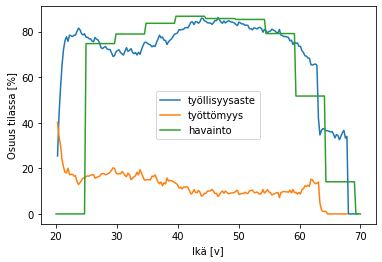

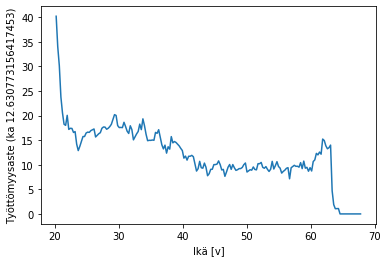

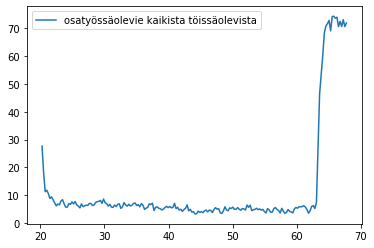

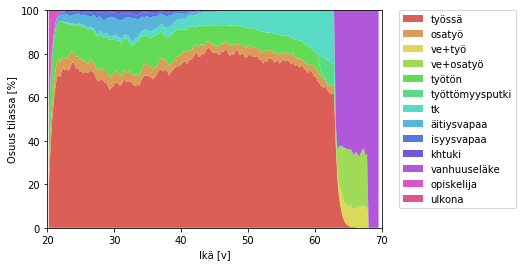

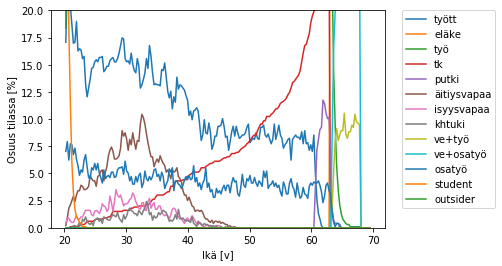

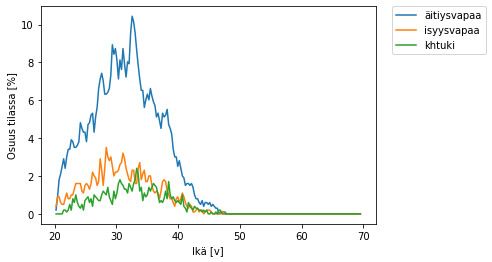

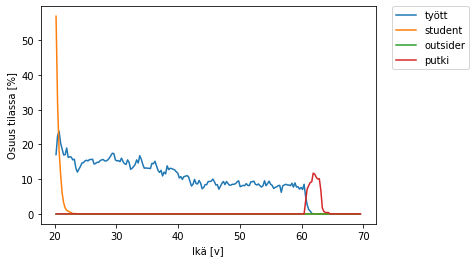

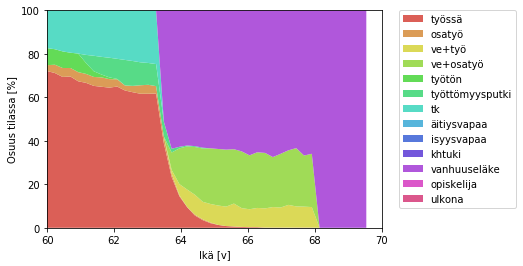

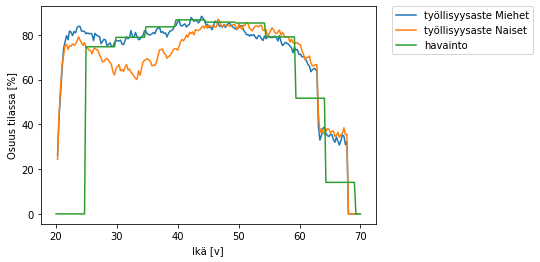

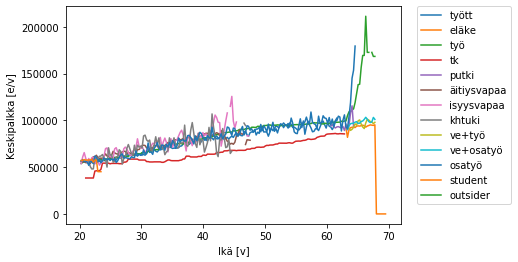

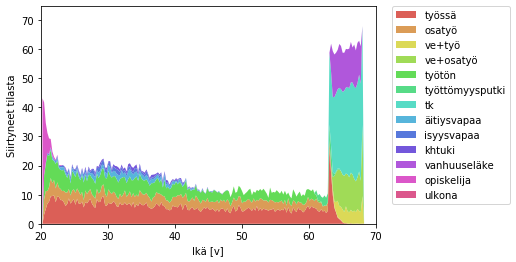

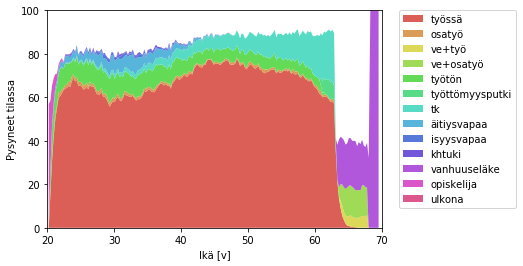

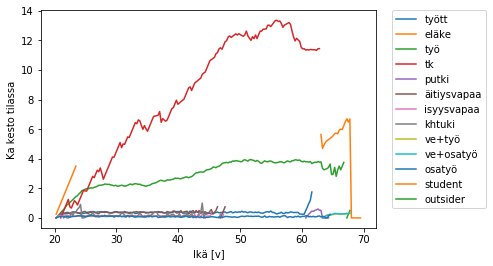

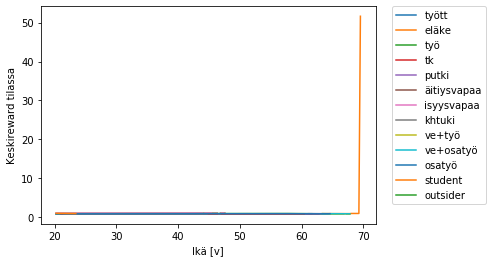

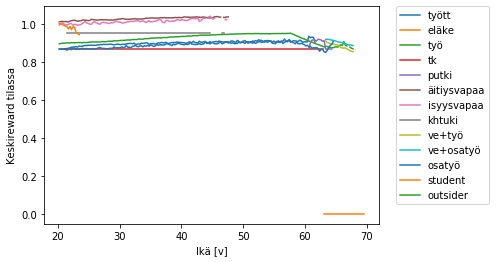

No handles with labels found to put in legend.


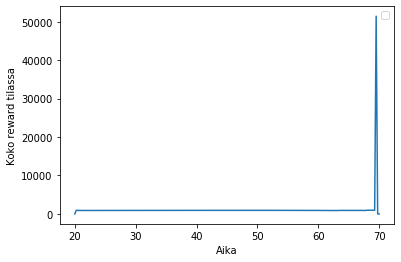

Yhteensä reward 235.13279878117916


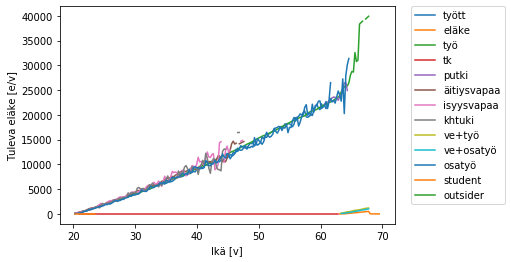

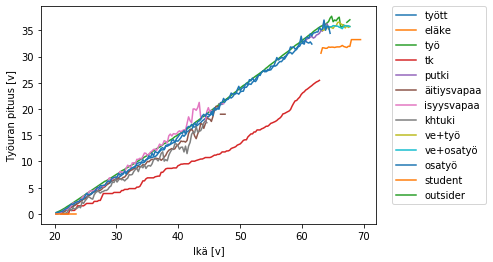

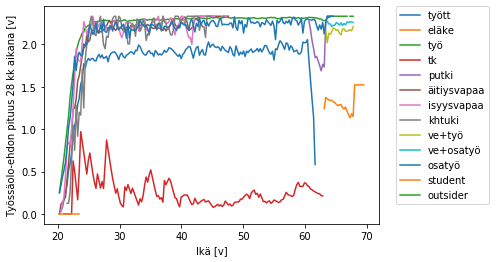

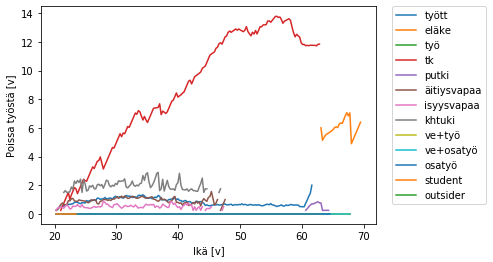

In [3]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1.explain()
cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/perus_results4',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

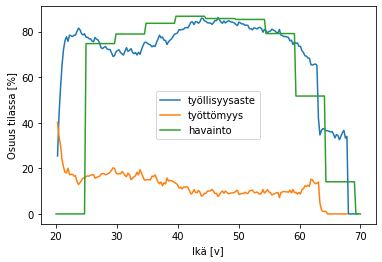

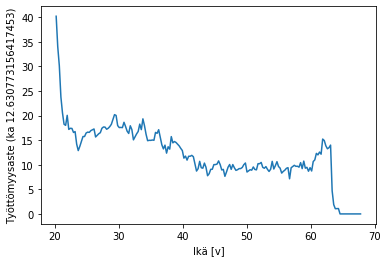

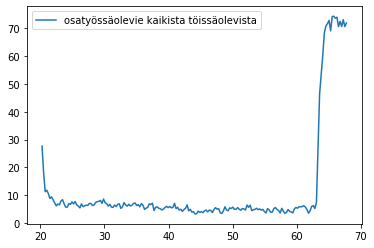

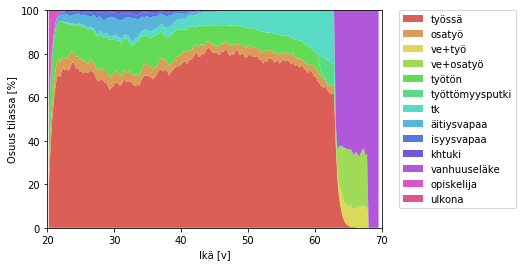

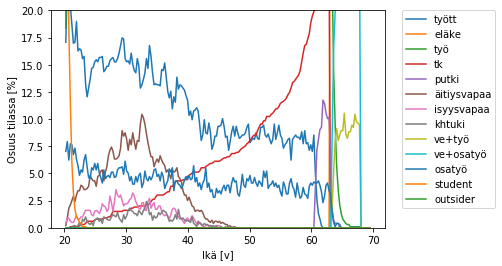

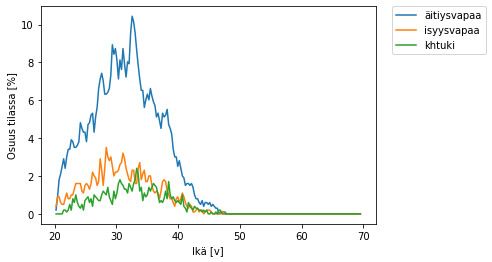

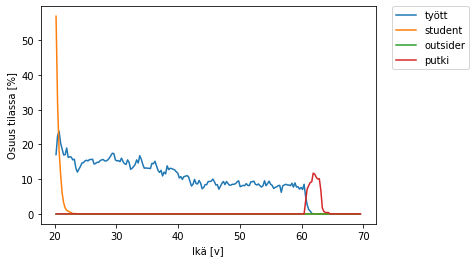

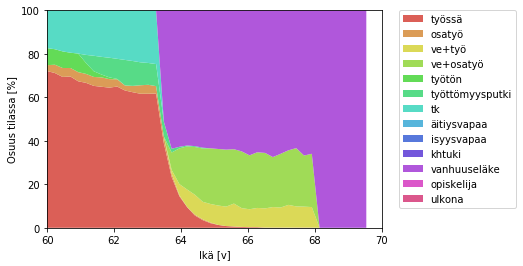

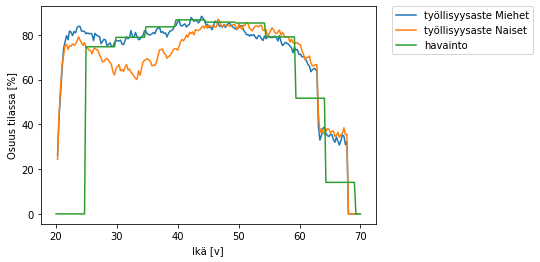

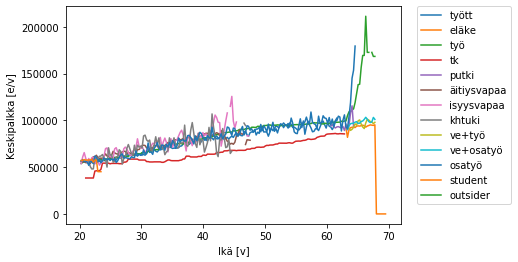

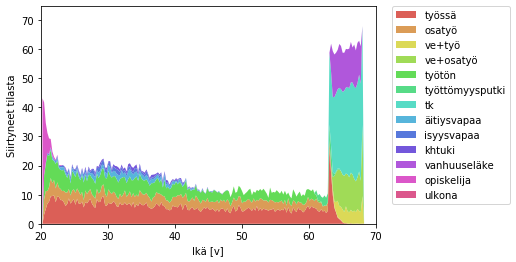

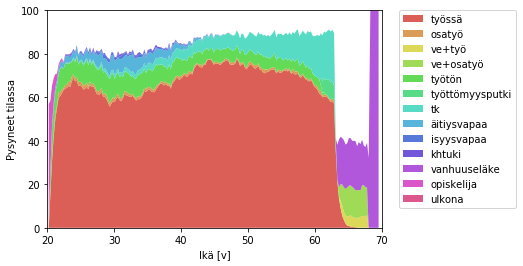

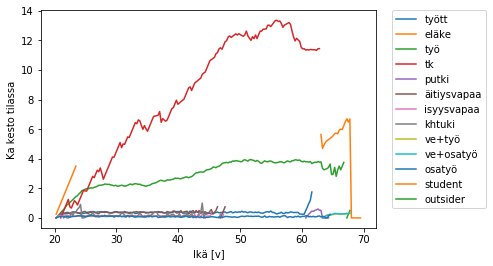

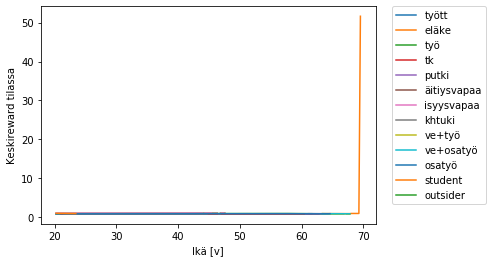

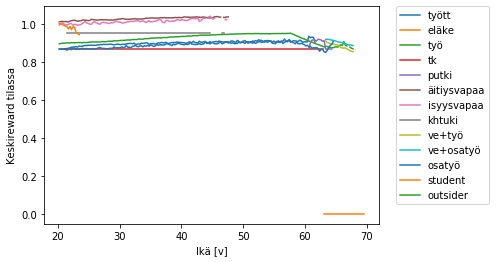

No handles with labels found to put in legend.


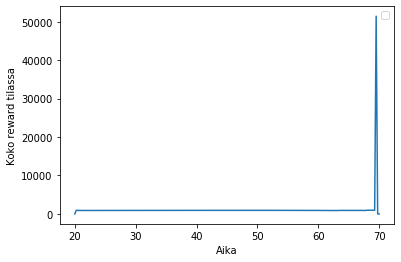

Yhteensä reward 235.13279878117916


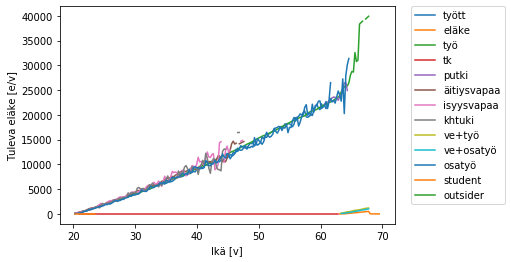

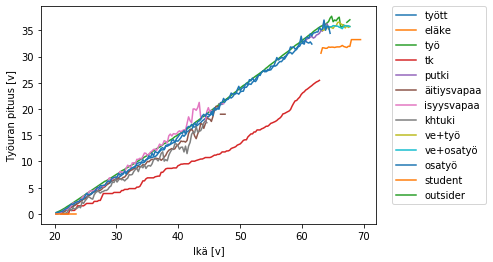

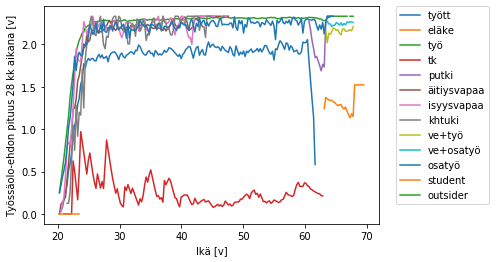

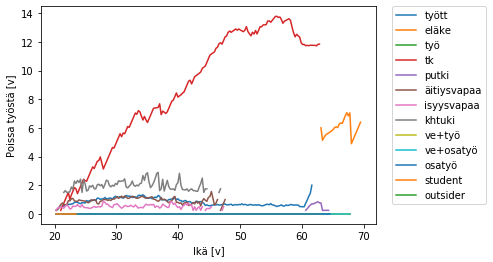

In [4]:
cc1.render(load='results/perus_results4')

# Porrastettu työttömyysturva



No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.968    |
| fps                | 1124     |
| nupdates           | 1        |
| policy_entropy     | 1        |
| policy_loss        | -0.0615  |
| total_timesteps    | 0        |
| value_loss         | 0.417    |
---------------------------------
---------------------------------
| explained_variance | 0.489    |
| fps                | 1834     |
| nupdates           | 10       |
| policy_entropy     | 0.405    |
| policy_loss        | -1.56    |
| total_timesteps    | 22041    |
| value_loss         | 18.6     |
---------------------------------
---------------------------------
| explained_variance | 0.779    |
| fps                | 1662     |
| nupdates           | 20       |
| policy_entropy     | 0.43     |
| policy_loss        | -0.0809  |
| total_timesteps    | 46531    |
| value_loss         | 2.53     |
------------------------

---------------------------------
| explained_variance | 0.926    |
| fps                | 12       |
| nupdates           | 270      |
| policy_entropy     | 0.43     |
| policy_loss        | 0.241    |
| total_timesteps    | 658781   |
| value_loss         | 0.932    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 12       |
| nupdates           | 280      |
| policy_entropy     | 0.313    |
| policy_loss        | 0.268    |
| total_timesteps    | 683271   |
| value_loss         | 1.71     |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 13       |
| nupdates           | 290      |
| policy_entropy     | 0.359    |
| policy_loss        | -0.278   |
| total_timesteps    | 707761   |
| value_loss         | 1.37     |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 24       |
| nupdates           | 540      |
| policy_entropy     | 0.392    |
| policy_loss        | -0.0481  |
| total_timesteps    | 1320011  |
| value_loss         | 0.252    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 25       |
| nupdates           | 550      |
| policy_entropy     | 0.411    |
| policy_loss        | 0.053    |
| total_timesteps    | 1344501  |
| value_loss         | 0.546    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 25       |
| nupdates           | 560      |
| policy_entropy     | 0.443    |
| policy_loss        | -0.0509  |
| total_timesteps    | 1368991  |
| value_loss         | 0.512    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 36       |
| nupdates           | 810      |
| policy_entropy     | 0.329    |
| policy_loss        | 0.0285   |
| total_timesteps    | 1981241  |
| value_loss         | 0.224    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 37       |
| nupdates           | 820      |
| policy_entropy     | 0.386    |
| policy_loss        | -0.021   |
| total_timesteps    | 2005731  |
| value_loss         | 0.307    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 37       |
| nupdates           | 830      |
| policy_entropy     | 0.336    |
| policy_loss        | 0.0678   |
| total_timesteps    | 2030221  |
| value_loss         | 0.338    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.931    |
| fps                | 48       |
| nupdates           | 1080     |
| policy_entropy     | 0.448    |
| policy_loss        | -0.0435  |
| total_timesteps    | 2642471  |
| value_loss         | 0.503    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 48       |
| nupdates           | 1090     |
| policy_entropy     | 0.34     |
| policy_loss        | 0.0212   |
| total_timesteps    | 2666961  |
| value_loss         | 0.266    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 49       |
| nupdates           | 1100     |
| policy_entropy     | 0.329    |
| policy_loss        | 0.0255   |
| total_timesteps    | 2691451  |
| value_loss         | 0.223    |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 60       |
| nupdates           | 1350     |
| policy_entropy     | 0.446    |
| policy_loss        | -0.139   |
| total_timesteps    | 3303701  |
| value_loss         | 0.504    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 60       |
| nupdates           | 1360     |
| policy_entropy     | 0.445    |
| policy_loss        | 0.0576   |
| total_timesteps    | 3328191  |
| value_loss         | 0.411    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 60       |
| nupdates           | 1370     |
| policy_entropy     | 0.409    |
| policy_loss        | 0.0474   |
| total_timesteps    | 3352681  |
| value_loss         | 0.325    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 71       |
| nupdates           | 1620     |
| policy_entropy     | 0.386    |
| policy_loss        | 0.0214   |
| total_timesteps    | 3964931  |
| value_loss         | 0.286    |
---------------------------------
----------------------------------
| explained_variance | 0.974     |
| fps                | 71        |
| nupdates           | 1630      |
| policy_entropy     | 0.366     |
| policy_loss        | -0.000963 |
| total_timesteps    | 3989421   |
| value_loss         | 0.424     |
----------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 72       |
| nupdates           | 1640     |
| policy_entropy     | 0.436    |
| policy_loss        | -0.0197  |
| total_timesteps    | 4013911  |
| value_loss         | 0.569    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps

---------------------------------
| explained_variance | 0.975    |
| fps                | 82       |
| nupdates           | 1890     |
| policy_entropy     | 0.774    |
| policy_loss        | 0.147    |
| total_timesteps    | 4626161  |
| value_loss         | 0.369    |
---------------------------------
---------------------------------
| explained_variance | 0.934    |
| fps                | 83       |
| nupdates           | 1900     |
| policy_entropy     | 0.817    |
| policy_loss        | -0.269   |
| total_timesteps    | 4650651  |
| value_loss         | 0.913    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 83       |
| nupdates           | 1910     |
| policy_entropy     | 0.822    |
| policy_loss        | -0.00823 |
| total_timesteps    | 4675141  |
| value_loss         | 0.383    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 93       |
| nupdates           | 2160     |
| policy_entropy     | 0.767    |
| policy_loss        | -0.0077  |
| total_timesteps    | 5287391  |
| value_loss         | 0.375    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 94       |
| nupdates           | 2170     |
| policy_entropy     | 0.725    |
| policy_loss        | -0.122   |
| total_timesteps    | 5311881  |
| value_loss         | 0.325    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 94       |
| nupdates           | 2180     |
| policy_entropy     | 0.781    |
| policy_loss        | 0.073    |
| total_timesteps    | 5336371  |
| value_loss         | 0.471    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 95       |
| nupdates           | 2430     |
| policy_entropy     | 0.863    |
| policy_loss        | 0.0106   |
| total_timesteps    | 5948621  |
| value_loss         | 0.257    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 96       |
| nupdates           | 2440     |
| policy_entropy     | 0.769    |
| policy_loss        | -0.2     |
| total_timesteps    | 5973111  |
| value_loss         | 0.803    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 96       |
| nupdates           | 2450     |
| policy_entropy     | 0.816    |
| policy_loss        | 0.133    |
| total_timesteps    | 5997601  |
| value_loss         | 0.496    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 105      |
| nupdates           | 2700     |
| policy_entropy     | 0.831    |
| policy_loss        | -0.233   |
| total_timesteps    | 6609851  |
| value_loss         | 0.394    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 106      |
| nupdates           | 2710     |
| policy_entropy     | 0.85     |
| policy_loss        | 0.194    |
| total_timesteps    | 6634341  |
| value_loss         | 0.588    |
---------------------------------
---------------------------------
| explained_variance | 0.921    |
| fps                | 106      |
| nupdates           | 2720     |
| policy_entropy     | 0.829    |
| policy_loss        | -0.136   |
| total_timesteps    | 6658831  |
| value_loss         | 0.525    |
---------------------------------
---------------------------------
| explained_variance | 0.934    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 115      |
| nupdates           | 2970     |
| policy_entropy     | 0.824    |
| policy_loss        | -0.0143  |
| total_timesteps    | 7271081  |
| value_loss         | 0.242    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 115      |
| nupdates           | 2980     |
| policy_entropy     | 0.729    |
| policy_loss        | -0.00551 |
| total_timesteps    | 7295571  |
| value_loss         | 0.427    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 116      |
| nupdates           | 2990     |
| policy_entropy     | 0.743    |
| policy_loss        | 0.103    |
| total_timesteps    | 7320061  |
| value_loss         | 0.323    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 125      |
| nupdates           | 3240     |
| policy_entropy     | 0.87     |
| policy_loss        | -0.114   |
| total_timesteps    | 7932311  |
| value_loss         | 0.308    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 125      |
| nupdates           | 3250     |
| policy_entropy     | 0.814    |
| policy_loss        | 0.00124  |
| total_timesteps    | 7956801  |
| value_loss         | 0.264    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 125      |
| nupdates           | 3260     |
| policy_entropy     | 0.758    |
| policy_loss        | -0.0671  |
| total_timesteps    | 7981291  |
| value_loss         | 0.333    |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 134      |
| nupdates           | 3510     |
| policy_entropy     | 0.856    |
| policy_loss        | -0.111   |
| total_timesteps    | 8593541  |
| value_loss         | 0.24     |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 134      |
| nupdates           | 3520     |
| policy_entropy     | 0.788    |
| policy_loss        | -0.0896  |
| total_timesteps    | 8618031  |
| value_loss         | 0.399    |
---------------------------------
---------------------------------
| explained_variance | 0.936    |
| fps                | 135      |
| nupdates           | 3530     |
| policy_entropy     | 0.812    |
| policy_loss        | -0.183   |
| total_timesteps    | 8642521  |
| value_loss         | 0.769    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.925    |
| fps                | 137      |
| nupdates           | 3780     |
| policy_entropy     | 0.8      |
| policy_loss        | -0.169   |
| total_timesteps    | 9254771  |
| value_loss         | 0.846    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 138      |
| nupdates           | 3790     |
| policy_entropy     | 0.829    |
| policy_loss        | -0.0178  |
| total_timesteps    | 9279261  |
| value_loss         | 0.388    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 138      |
| nupdates           | 3800     |
| policy_entropy     | 0.787    |
| policy_loss        | 0.0115   |
| total_timesteps    | 9303751  |
| value_loss         | 0.269    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 146      |
| nupdates           | 4050     |
| policy_entropy     | 0.759    |
| policy_loss        | 0.0347   |
| total_timesteps    | 9916001  |
| value_loss         | 0.251    |
---------------------------------
---------------------------------
| explained_variance | 0.935    |
| fps                | 146      |
| nupdates           | 4060     |
| policy_entropy     | 0.816    |
| policy_loss        | -0.129   |
| total_timesteps    | 9940491  |
| value_loss         | 0.88     |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 146      |
| nupdates           | 4070     |
| policy_entropy     | 0.837    |
| policy_loss        | -0.0502  |
| total_timesteps    | 9964981  |
| value_loss         | 0.434    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

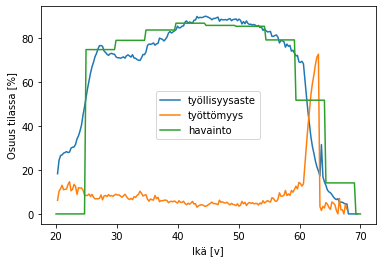

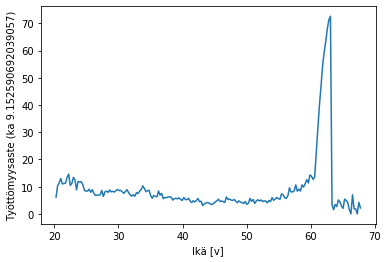

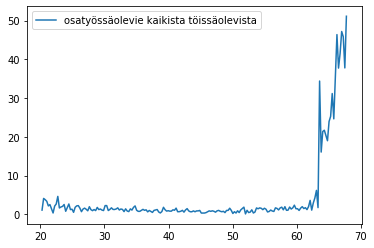

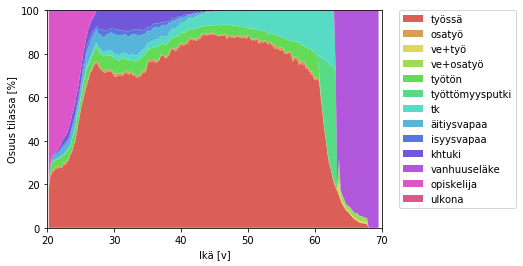

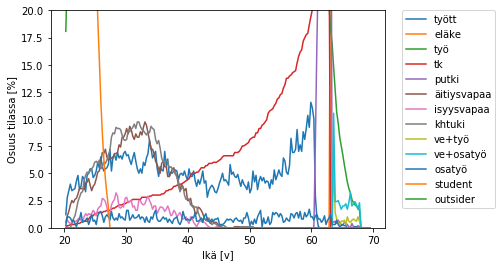

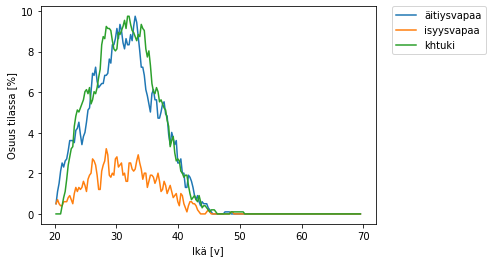

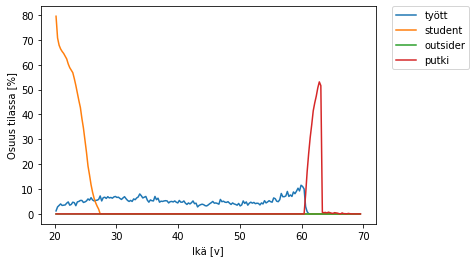

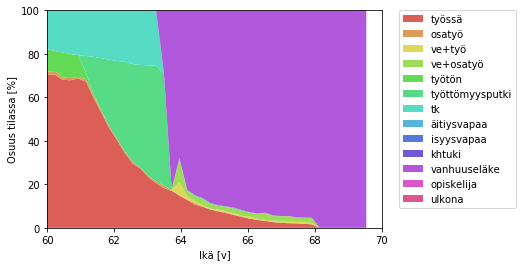

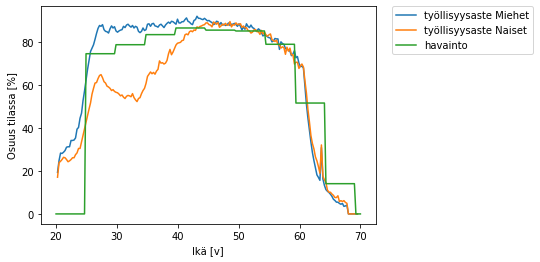

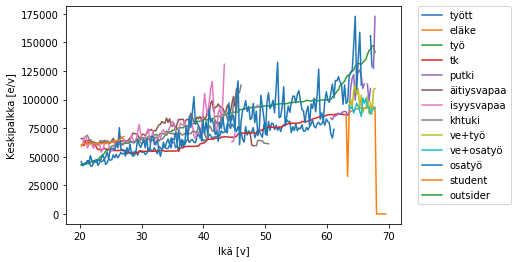

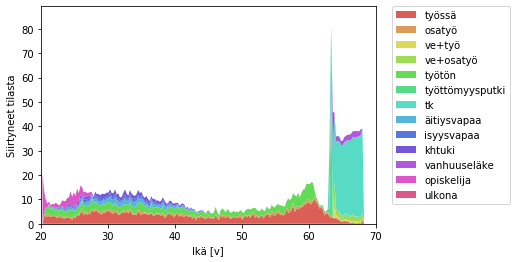

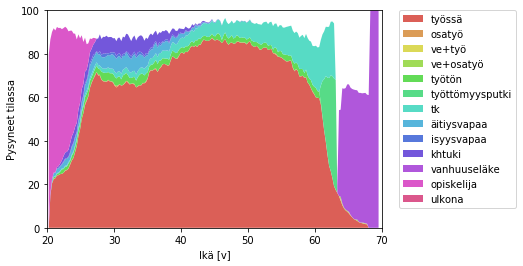

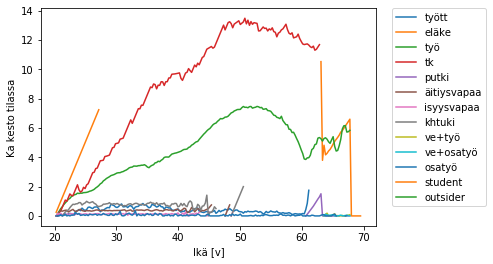

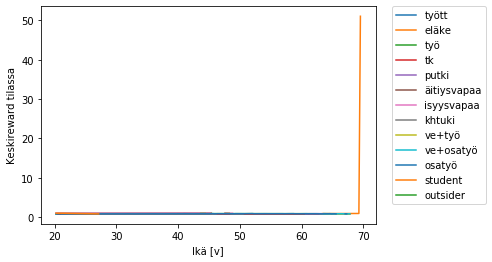

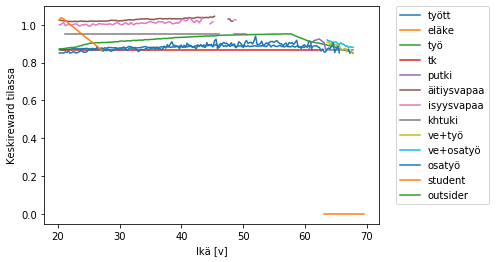

No handles with labels found to put in legend.


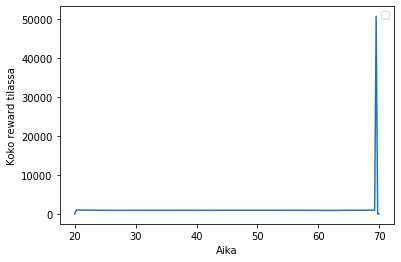

Yhteensä reward 236.32703883267374


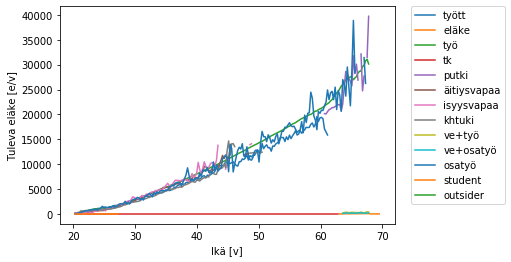

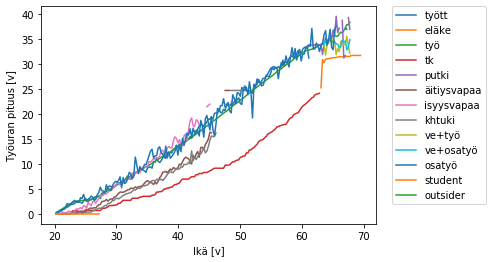

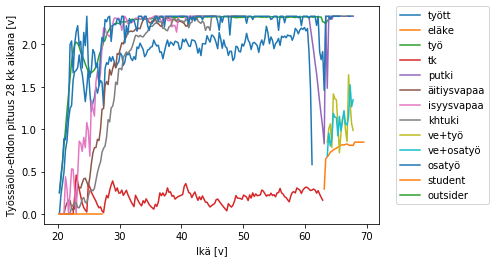

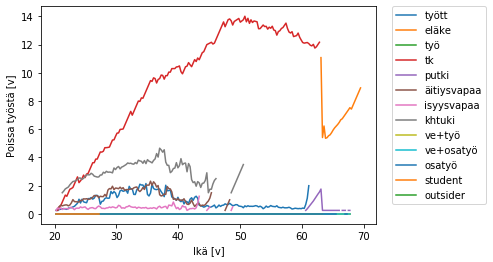

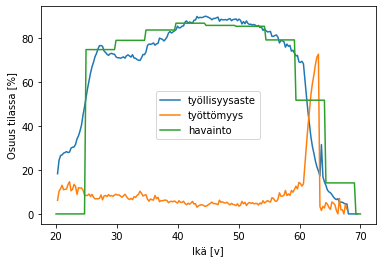

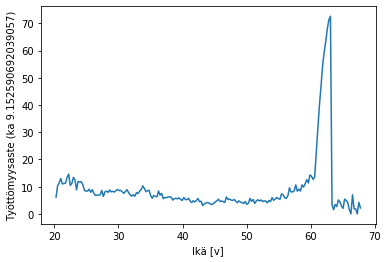

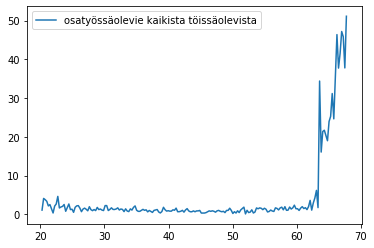

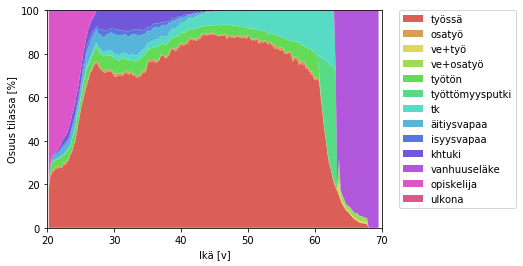

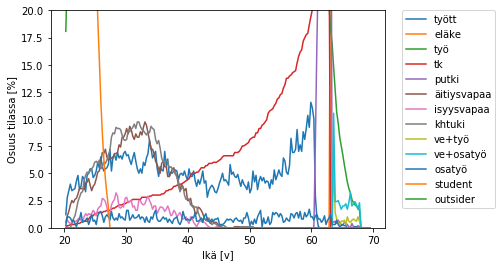

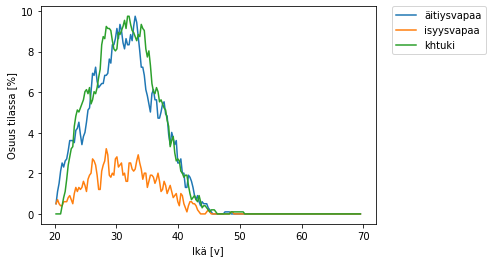

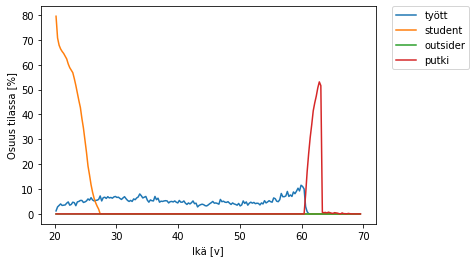

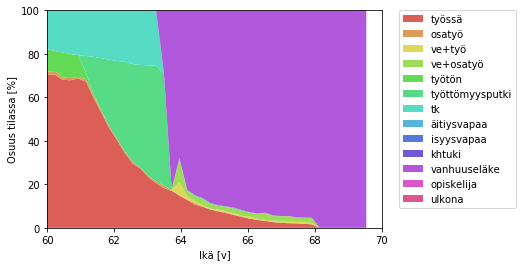

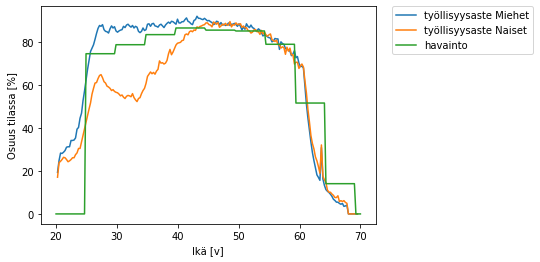

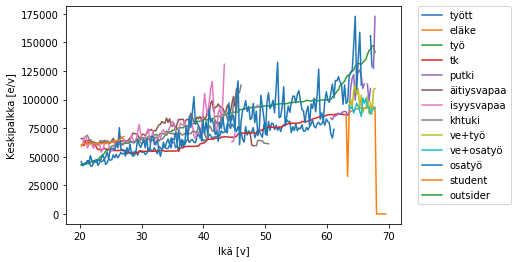

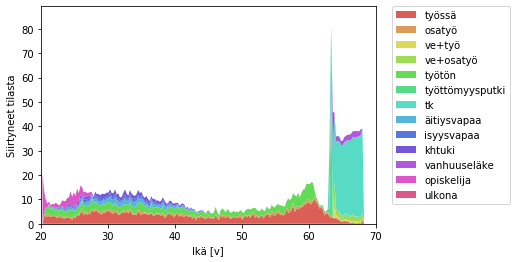

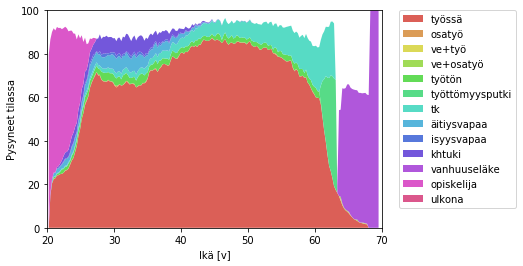

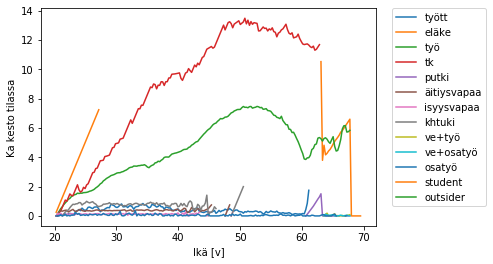

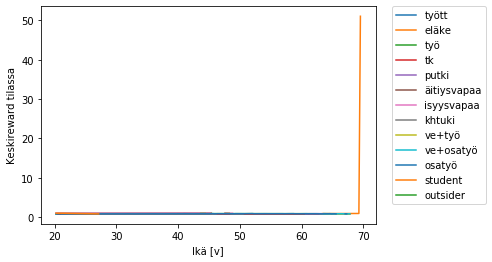

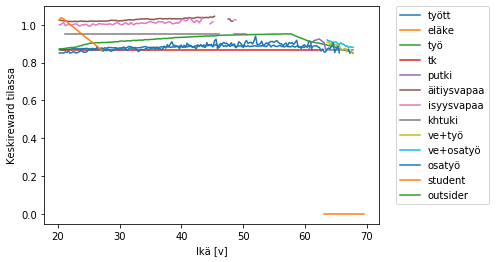

No handles with labels found to put in legend.


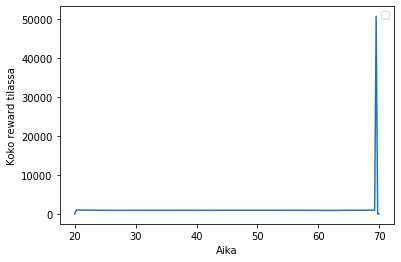

Yhteensä reward 236.32703883267374


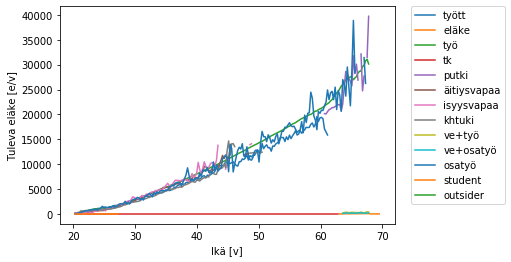

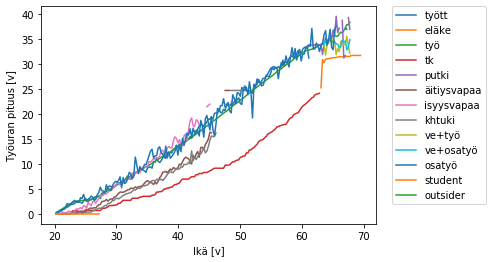

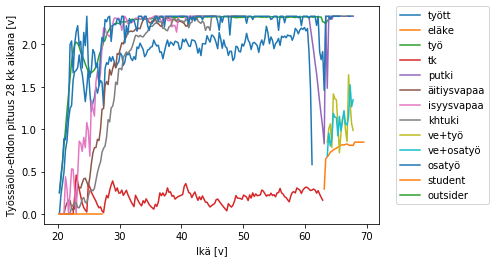

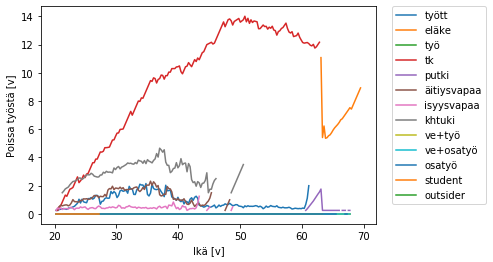

In [5]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_steps',plot=True,
                results='results/steps_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc2_porras.render(load='results/steps_results')


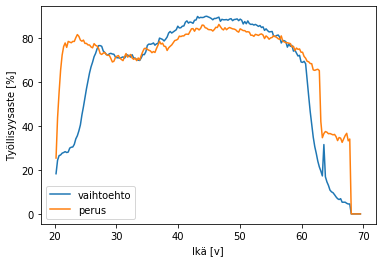

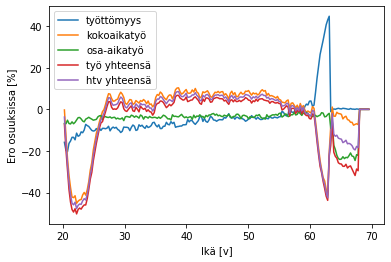

Työllisyysvaikutus 30-63-vuotiaisiin noin 65176.0 htv ja 27677.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 3.754172697098479 prosenttia
Epävarmuus työllisyysasteissa 0.061980642139300234, hajonta 0.10354054200406981


In [6]:
cc2_porras.compare_with(cc1)

# Työttömyysputken poisto

Työttömyysputkelle meneminen on usein hyvin suosittua elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.984    |
| fps                | 899      |
| nupdates           | 1        |
| policy_entropy     | 0.978    |
| policy_loss        | 0.255    |
| total_timesteps    | 0        |
| value_loss         | 0.323    |
---------------------------------
---------------------------------
| explained_variance | 0.621    |
| fps                | 1663     |
| nupdates           | 10       |
| policy_entropy     | 0.968    |
| policy_loss        | -3.46    |
| total_timesteps    | 22041    |
| value_loss         | 16       |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 1566     |
| nupdates           | 20       |
| policy_entropy     | 0.876    |
| policy_loss        | 1.49     |
| total_timesteps    | 46531    |
| value_loss         | 3.96     |
------------------------

---------------------------------
| explained_variance | 0.94     |
| fps                | 1346     |
| nupdates           | 270      |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0397  |
| total_timesteps    | 658781   |
| value_loss         | 0.977    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 1341     |
| nupdates           | 280      |
| policy_entropy     | 0.987    |
| policy_loss        | -1.15    |
| total_timesteps    | 683271   |
| value_loss         | 2.03     |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 1340     |
| nupdates           | 290      |
| policy_entropy     | 0.961    |
| policy_loss        | 0.658    |
| total_timesteps    | 707761   |
| value_loss         | 1.29     |
---------------------------------
---------------------------------
| explained_variance | 0.901    |
| fps         

---------------------------------
| explained_variance | 0.894    |
| fps                | 1275     |
| nupdates           | 540      |
| policy_entropy     | 0.909    |
| policy_loss        | -0.0834  |
| total_timesteps    | 1320011  |
| value_loss         | 0.531    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 1274     |
| nupdates           | 550      |
| policy_entropy     | 0.905    |
| policy_loss        | -0.128   |
| total_timesteps    | 1344501  |
| value_loss         | 0.52     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1273     |
| nupdates           | 560      |
| policy_entropy     | 0.871    |
| policy_loss        | 0.0373   |
| total_timesteps    | 1368991  |
| value_loss         | 0.262    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 1223     |
| nupdates           | 810      |
| policy_entropy     | 0.843    |
| policy_loss        | 0.0277   |
| total_timesteps    | 1981241  |
| value_loss         | 0.277    |
---------------------------------
done
simulating  best/malli_putki
predicting...


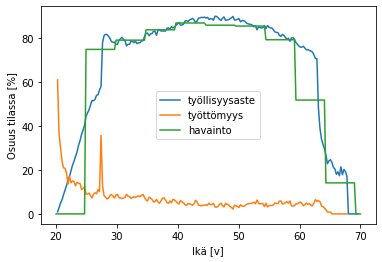

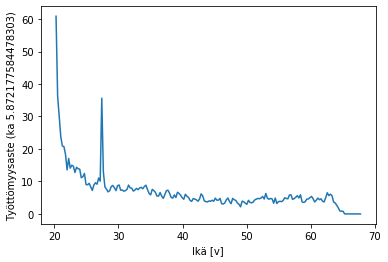

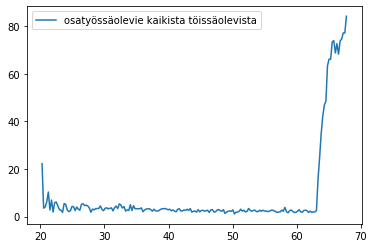

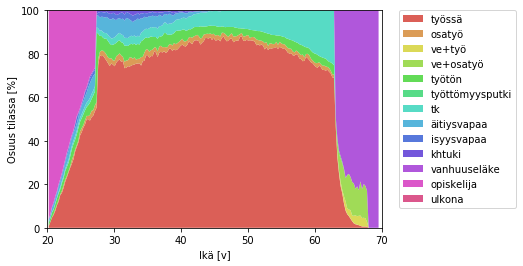

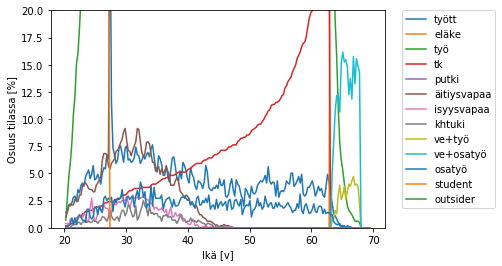

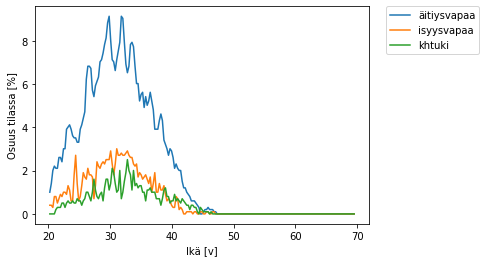

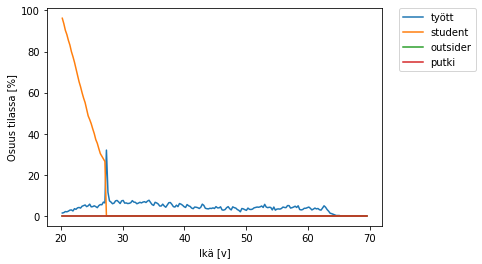

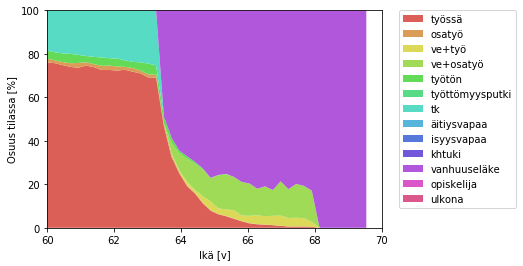

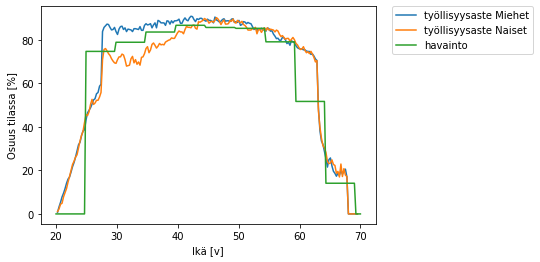

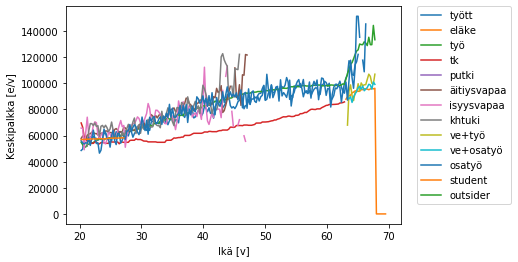

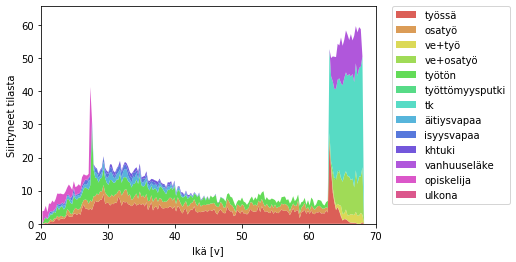

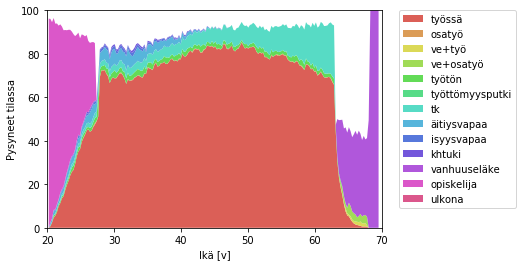

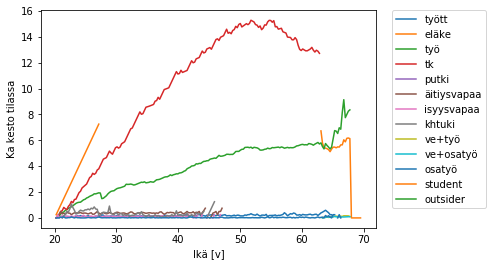

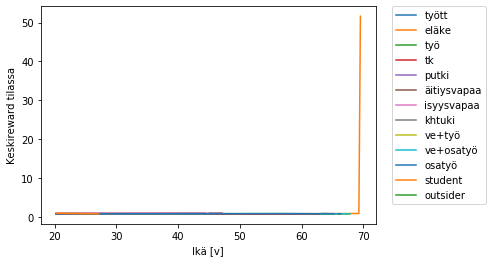

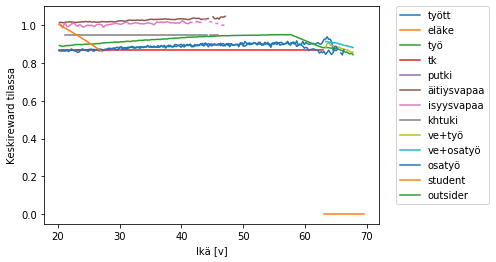

No handles with labels found to put in legend.


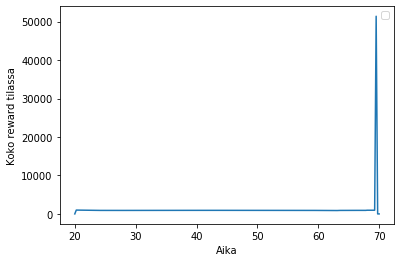

Yhteensä reward 236.36499891982493


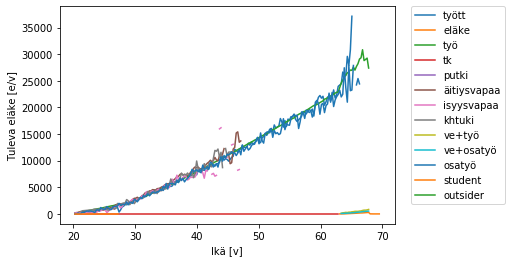

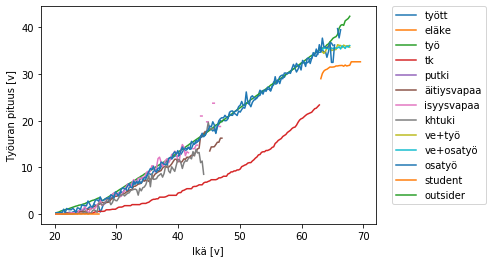

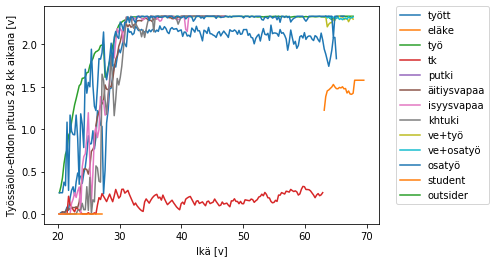

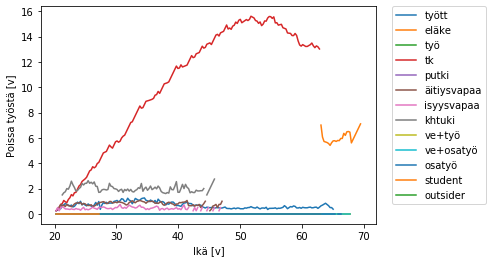

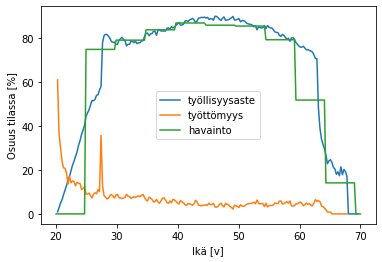

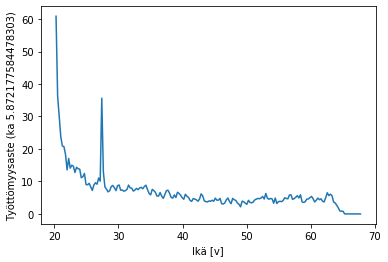

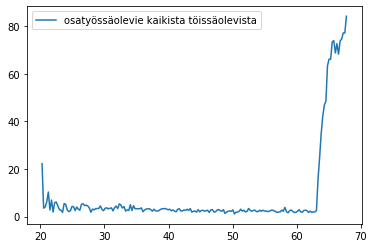

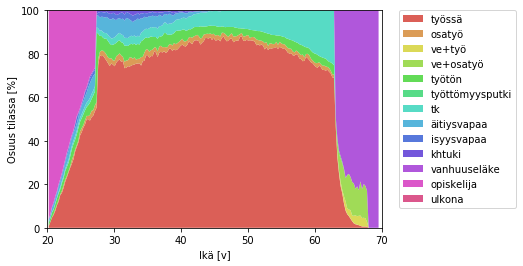

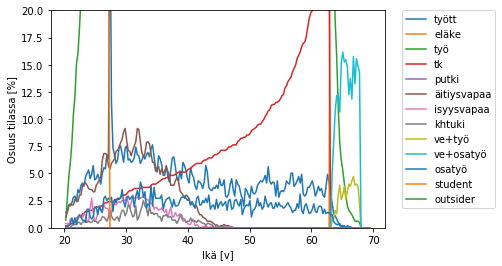

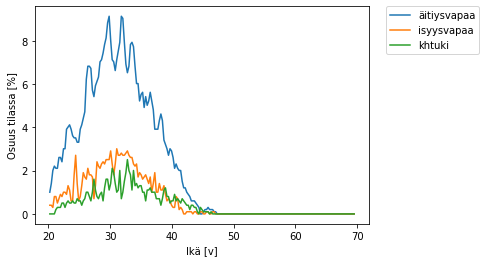

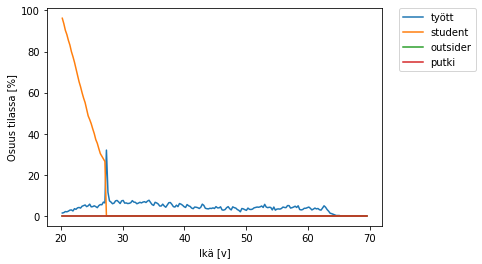

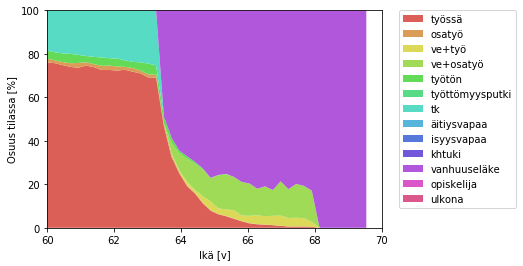

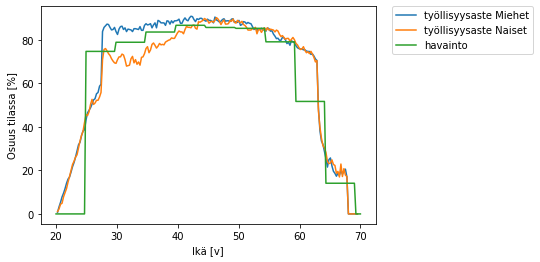

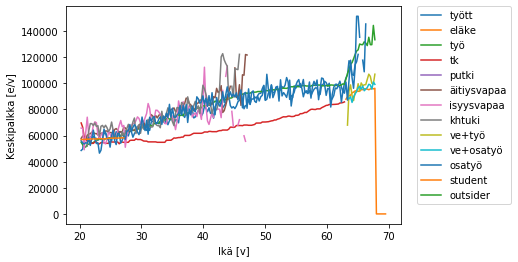

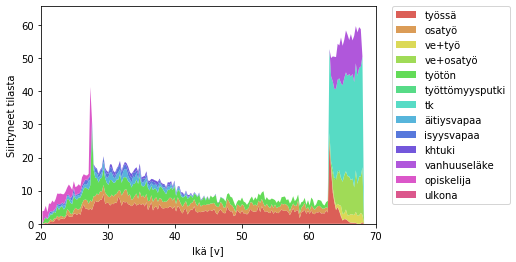

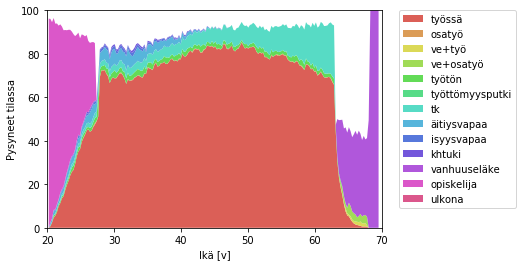

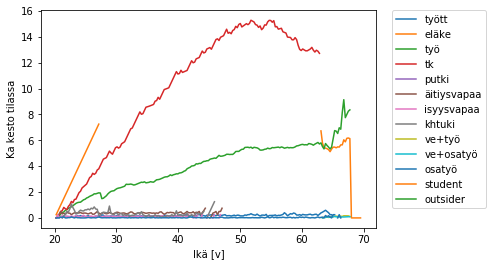

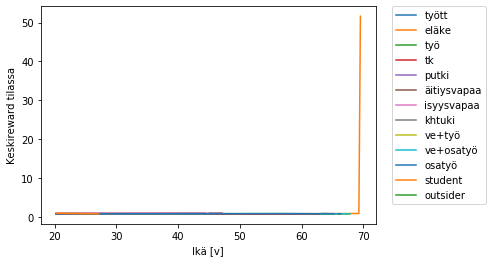

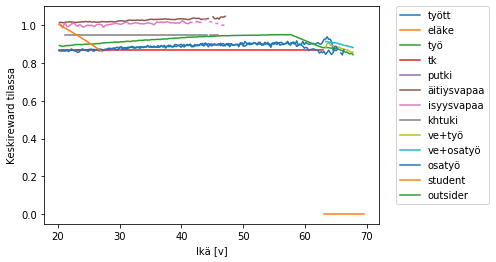

No handles with labels found to put in legend.


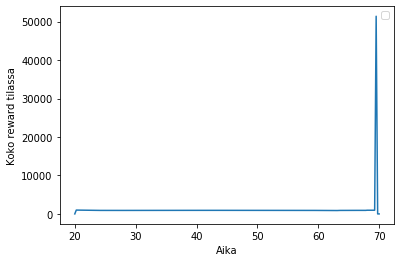

Yhteensä reward 236.36499891982493


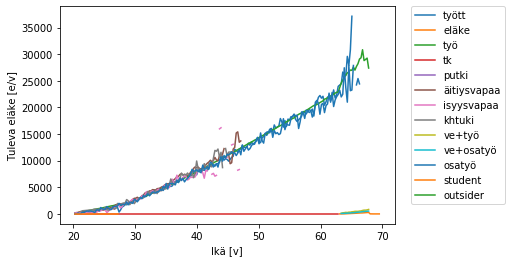

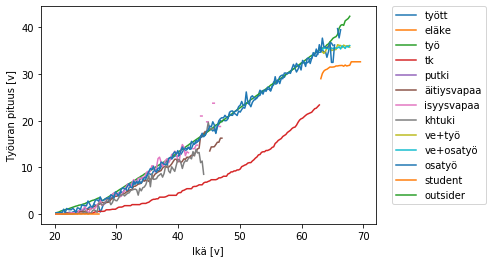

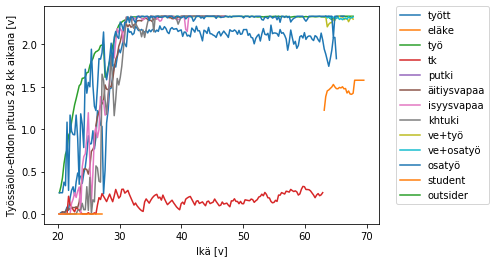

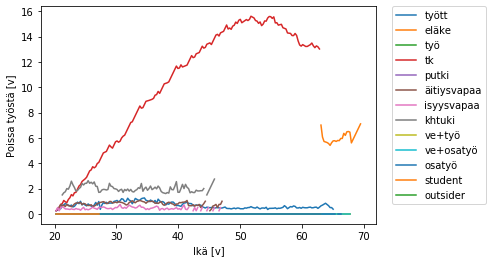

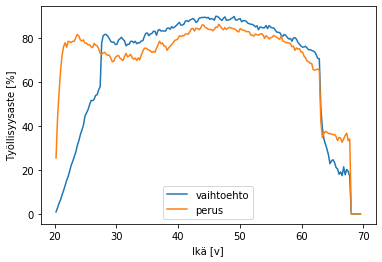

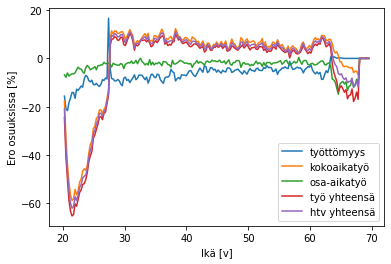

Työllisyysvaikutus 30-63-vuotiaisiin noin 140173.0 htv ja 118677.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 16.097624495919185 prosenttia
Epävarmuus työllisyysasteissa 0.061980642139300234, hajonta 0.0450700666082559


In [7]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                      train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_putki',
                      plot=True,results='results/putki_results',start_from=perusmalli,cont=True,
                      callback_minsteps=callback_minsteps,twostage=twostage)
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1)                    

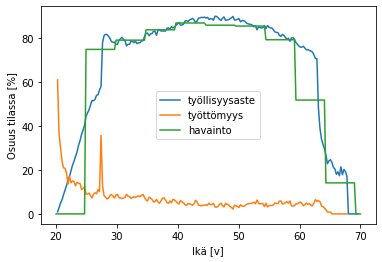

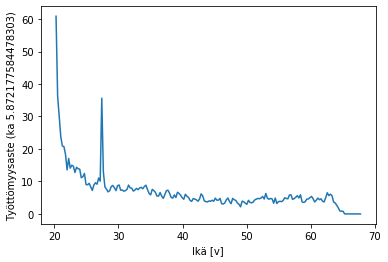

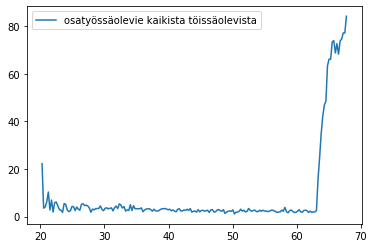

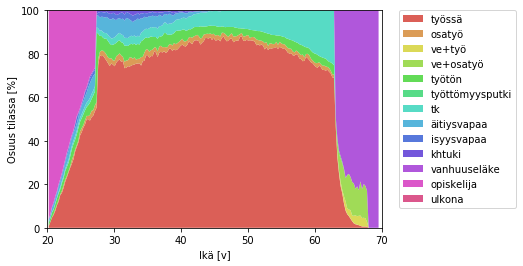

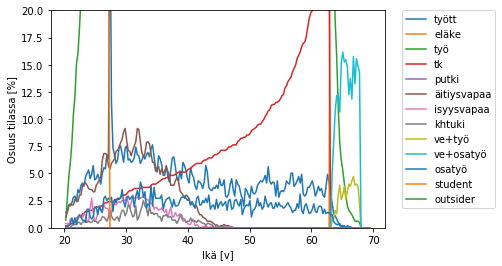

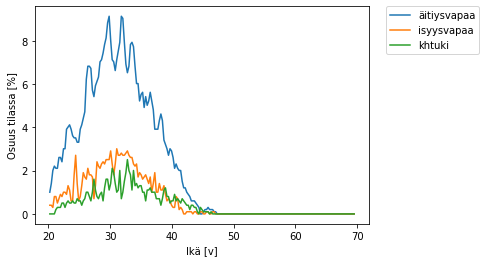

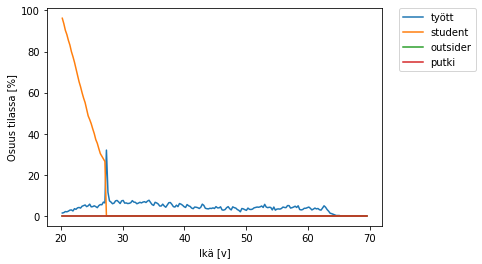

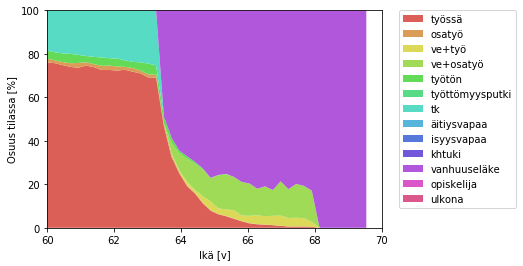

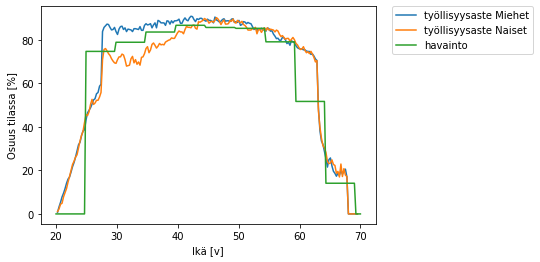

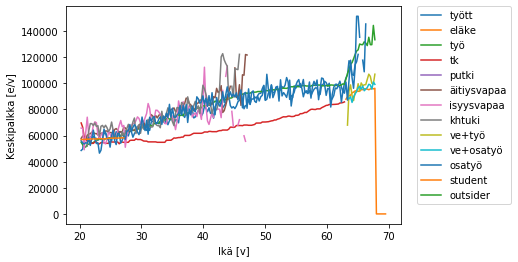

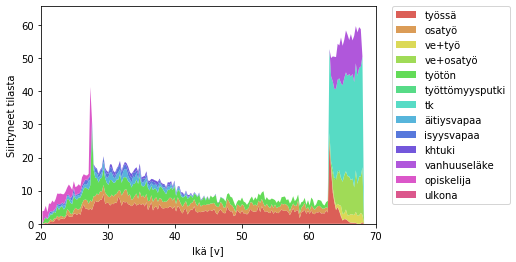

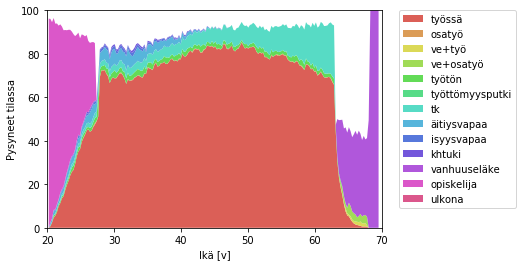

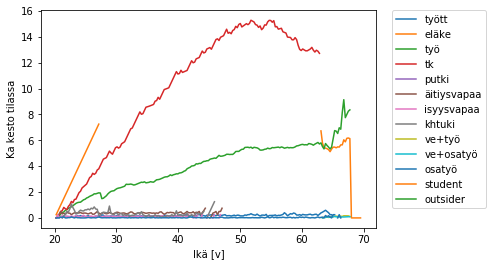

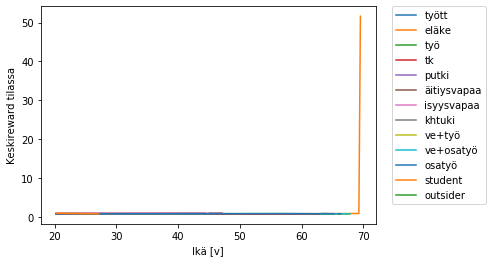

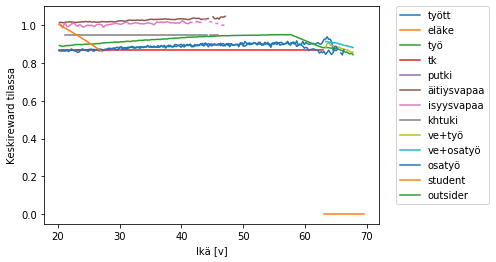

No handles with labels found to put in legend.


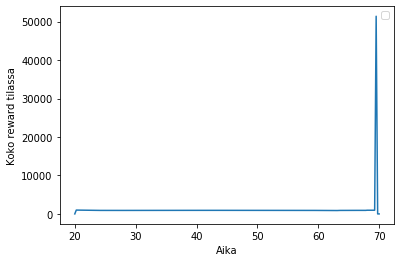

Yhteensä reward 236.36499891982493


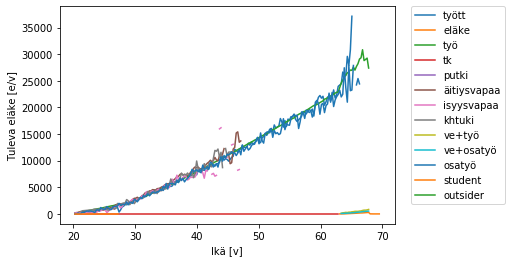

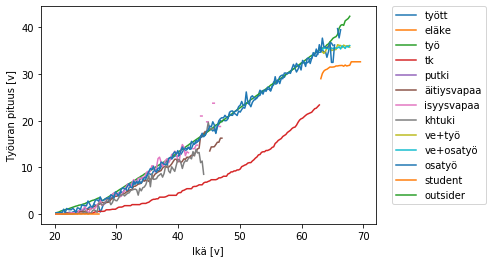

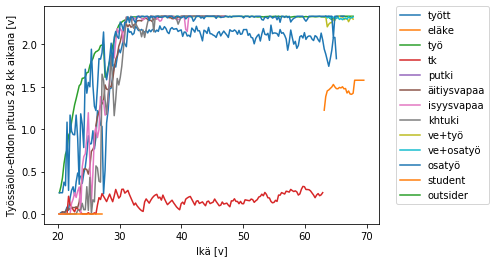

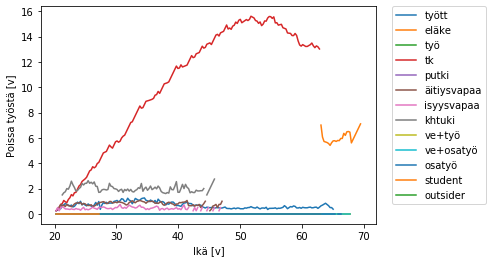

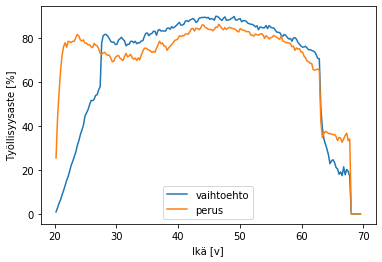

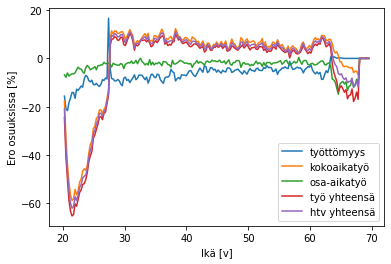

Työllisyysvaikutus 30-63-vuotiaisiin noin 140173.0 htv ja 118677.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 16.097624495919185 prosenttia
Epävarmuus työllisyysasteissa 0.061980642139300234, hajonta 0.0450700666082559


In [8]:
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1) 

# EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.971    |
| fps                | 1026     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0624  |
| total_timesteps    | 0        |
| value_loss         | 0.509    |
---------------------------------
---------------------------------
| explained_variance | 0.629    |
| fps                | 1654     |
| nupdates           | 10       |
| policy_entropy     | 1.08     |
| policy_loss        | -1.38    |
| total_timesteps    | 22041    |
| value_loss         | 5.64     |
---------------------------------
---------------------------------
| explained_variance | 0.681    |
| fps                | 1314     |
| nupdates           | 20       |
| policy_entropy     | 1.04     |
| policy_loss        | -0.243   |
| total_timesteps    | 46531    |
| value_loss         | 3.14     |
------------------------

---------------------------------
| explained_variance | 0.969    |
| fps                | 1071     |
| nupdates           | 270      |
| policy_entropy     | 0.907    |
| policy_loss        | 0.121    |
| total_timesteps    | 658781   |
| value_loss         | 0.39     |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 1074     |
| nupdates           | 280      |
| policy_entropy     | 0.879    |
| policy_loss        | 0.0217   |
| total_timesteps    | 683271   |
| value_loss         | 0.337    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 1075     |
| nupdates           | 290      |
| policy_entropy     | 0.896    |
| policy_loss        | -0.0462  |
| total_timesteps    | 707761   |
| value_loss         | 0.269    |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 1105     |
| nupdates           | 540      |
| policy_entropy     | 0.846    |
| policy_loss        | 0.0156   |
| total_timesteps    | 1320011  |
| value_loss         | 0.513    |
---------------------------------
---------------------------------
| explained_variance | 0.936    |
| fps                | 1106     |
| nupdates           | 550      |
| policy_entropy     | 0.844    |
| policy_loss        | -0.05    |
| total_timesteps    | 1344501  |
| value_loss         | 0.629    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 1106     |
| nupdates           | 560      |
| policy_entropy     | 0.805    |
| policy_loss        | -0.0293  |
| total_timesteps    | 1368991  |
| value_loss         | 0.63     |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.887    |
| fps                | 1146     |
| nupdates           | 810      |
| policy_entropy     | 0.828    |
| policy_loss        | -0.0768  |
| total_timesteps    | 1981241  |
| value_loss         | 0.994    |
---------------------------------
---------------------------------
| explained_variance | 0.939    |
| fps                | 1146     |
| nupdates           | 820      |
| policy_entropy     | 0.827    |
| policy_loss        | -0.201   |
| total_timesteps    | 2005731  |
| value_loss         | 0.689    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 1143     |
| nupdates           | 830      |
| policy_entropy     | 0.812    |
| policy_loss        | -0.066   |
| total_timesteps    | 2030221  |
| value_loss         | 0.521    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 1159     |
| nupdates           | 1080     |
| policy_entropy     | 0.808    |
| policy_loss        | 0.132    |
| total_timesteps    | 2642471  |
| value_loss         | 0.492    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1160     |
| nupdates           | 1090     |
| policy_entropy     | 0.839    |
| policy_loss        | -0.17    |
| total_timesteps    | 2666961  |
| value_loss         | 0.544    |
---------------------------------
---------------------------------
| explained_variance | 0.939    |
| fps                | 1162     |
| nupdates           | 1100     |
| policy_entropy     | 0.818    |
| policy_loss        | -0.0242  |
| total_timesteps    | 2691451  |
| value_loss         | 0.516    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.937    |
| fps                | 638      |
| nupdates           | 1350     |
| policy_entropy     | 0.793    |
| policy_loss        | 0.127    |
| total_timesteps    | 3303701  |
| value_loss         | 0.468    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 640      |
| nupdates           | 1360     |
| policy_entropy     | 0.856    |
| policy_loss        | -0.159   |
| total_timesteps    | 3328191  |
| value_loss         | 0.498    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 642      |
| nupdates           | 1370     |
| policy_entropy     | 0.835    |
| policy_loss        | 0.0596   |
| total_timesteps    | 3352681  |
| value_loss         | 0.279    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.949    |
| fps                | 703      |
| nupdates           | 1620     |
| policy_entropy     | 0.771    |
| policy_loss        | 0.0938   |
| total_timesteps    | 3964931  |
| value_loss         | 0.713    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 705      |
| nupdates           | 1630     |
| policy_entropy     | 0.838    |
| policy_loss        | -0.0823  |
| total_timesteps    | 3989421  |
| value_loss         | 0.52     |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 708      |
| nupdates           | 1640     |
| policy_entropy     | 0.779    |
| policy_loss        | 0.0553   |
| total_timesteps    | 4013911  |
| value_loss         | 0.39     |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.894    |
| fps                | 759      |
| nupdates           | 1890     |
| policy_entropy     | 0.756    |
| policy_loss        | -0.742   |
| total_timesteps    | 4626161  |
| value_loss         | 1.79     |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 761      |
| nupdates           | 1900     |
| policy_entropy     | 0.784    |
| policy_loss        | -0.0908  |
| total_timesteps    | 4650651  |
| value_loss         | 0.496    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 763      |
| nupdates           | 1910     |
| policy_entropy     | 0.802    |
| policy_loss        | 0.503    |
| total_timesteps    | 4675141  |
| value_loss         | 1.05     |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps         

---------------------------------
| explained_variance | 0.942    |
| fps                | 803      |
| nupdates           | 2160     |
| policy_entropy     | 0.793    |
| policy_loss        | -0.143   |
| total_timesteps    | 5287391  |
| value_loss         | 0.621    |
---------------------------------
---------------------------------
| explained_variance | 0.91     |
| fps                | 805      |
| nupdates           | 2170     |
| policy_entropy     | 0.826    |
| policy_loss        | 0.814    |
| total_timesteps    | 5311881  |
| value_loss         | 1.71     |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 807      |
| nupdates           | 2180     |
| policy_entropy     | 0.751    |
| policy_loss        | -0.517   |
| total_timesteps    | 5336371  |
| value_loss         | 1.31     |
---------------------------------
---------------------------------
| explained_variance | 0.934    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 844      |
| nupdates           | 2430     |
| policy_entropy     | 0.799    |
| policy_loss        | -0.207   |
| total_timesteps    | 5948621  |
| value_loss         | 0.462    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 845      |
| nupdates           | 2440     |
| policy_entropy     | 0.791    |
| policy_loss        | -0.319   |
| total_timesteps    | 5973111  |
| value_loss         | 0.531    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 847      |
| nupdates           | 2450     |
| policy_entropy     | 0.824    |
| policy_loss        | 0.455    |
| total_timesteps    | 5997601  |
| value_loss         | 0.826    |
---------------------------------
---------------------------------
| explained_variance | 0.871    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 871      |
| nupdates           | 2700     |
| policy_entropy     | 0.778    |
| policy_loss        | 0.0919   |
| total_timesteps    | 6609851  |
| value_loss         | 0.247    |
---------------------------------
---------------------------------
| explained_variance | 0.92     |
| fps                | 873      |
| nupdates           | 2710     |
| policy_entropy     | 0.81     |
| policy_loss        | 0.00912  |
| total_timesteps    | 6634341  |
| value_loss         | 0.594    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 874      |
| nupdates           | 2720     |
| policy_entropy     | 0.798    |
| policy_loss        | -0.0372  |
| total_timesteps    | 6658831  |
| value_loss         | 0.452    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 900      |
| nupdates           | 2970     |
| policy_entropy     | 0.725    |
| policy_loss        | 0.161    |
| total_timesteps    | 7271081  |
| value_loss         | 0.45     |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 901      |
| nupdates           | 2980     |
| policy_entropy     | 0.777    |
| policy_loss        | 0.0526   |
| total_timesteps    | 7295571  |
| value_loss         | 0.669    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 902      |
| nupdates           | 2990     |
| policy_entropy     | 0.794    |
| policy_loss        | -0.0206  |
| total_timesteps    | 7320061  |
| value_loss         | 0.411    |
---------------------------------
---------------------------------
| explained_variance | 0.932    |
| fps         

---------------------------------
| explained_variance | 0.956    |
| fps                | 925      |
| nupdates           | 3240     |
| policy_entropy     | 0.843    |
| policy_loss        | -0.171   |
| total_timesteps    | 7932311  |
| value_loss         | 0.547    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 926      |
| nupdates           | 3250     |
| policy_entropy     | 0.835    |
| policy_loss        | -0.215   |
| total_timesteps    | 7956801  |
| value_loss         | 0.589    |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps                | 927      |
| nupdates           | 3260     |
| policy_entropy     | 0.797    |
| policy_loss        | 0.435    |
| total_timesteps    | 7981291  |
| value_loss         | 0.906    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps         

---------------------------------
| explained_variance | 0.956    |
| fps                | 948      |
| nupdates           | 3510     |
| policy_entropy     | 0.87     |
| policy_loss        | 0.416    |
| total_timesteps    | 8593541  |
| value_loss         | 0.665    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 948      |
| nupdates           | 3520     |
| policy_entropy     | 0.867    |
| policy_loss        | -0.0671  |
| total_timesteps    | 8618031  |
| value_loss         | 0.6      |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 948      |
| nupdates           | 3530     |
| policy_entropy     | 0.873    |
| policy_loss        | -0.273   |
| total_timesteps    | 8642521  |
| value_loss         | 0.688    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 962      |
| nupdates           | 3780     |
| policy_entropy     | 0.848    |
| policy_loss        | -0.101   |
| total_timesteps    | 9254771  |
| value_loss         | 0.342    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 962      |
| nupdates           | 3790     |
| policy_entropy     | 0.803    |
| policy_loss        | -0.017   |
| total_timesteps    | 9279261  |
| value_loss         | 0.283    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 961      |
| nupdates           | 3800     |
| policy_entropy     | 0.823    |
| policy_loss        | -0.0348  |
| total_timesteps    | 9303751  |
| value_loss         | 0.496    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 447      |
| nupdates           | 4050     |
| policy_entropy     | 0.801    |
| policy_loss        | 0.0426   |
| total_timesteps    | 9916001  |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 448      |
| nupdates           | 4060     |
| policy_entropy     | 0.806    |
| policy_loss        | -0.0252  |
| total_timesteps    | 9940491  |
| value_loss         | 0.251    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 449      |
| nupdates           | 4070     |
| policy_entropy     | 0.776    |
| policy_loss        | 0.0589   |
| total_timesteps    | 9964981  |
| value_loss         | 0.372    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

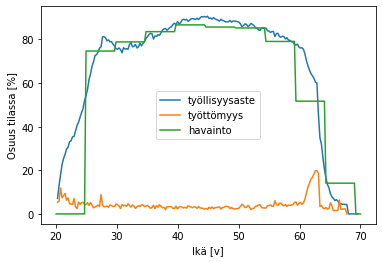

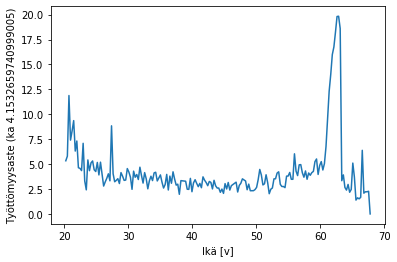

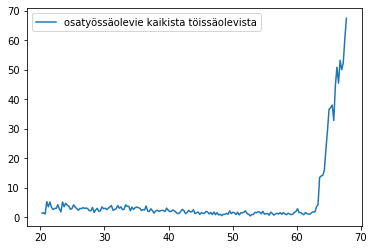

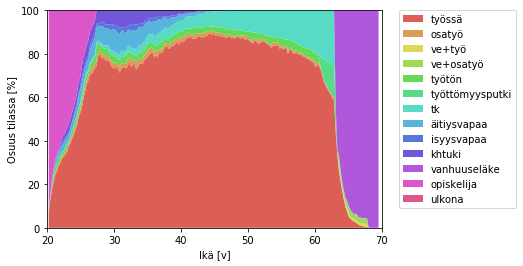

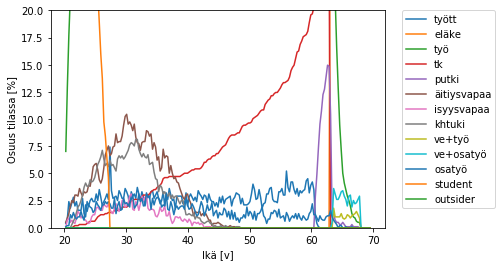

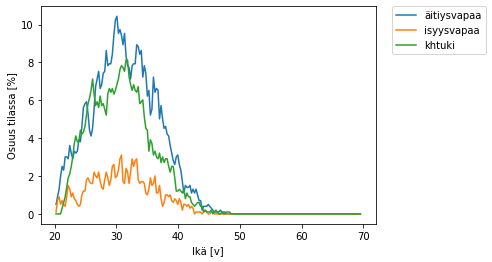

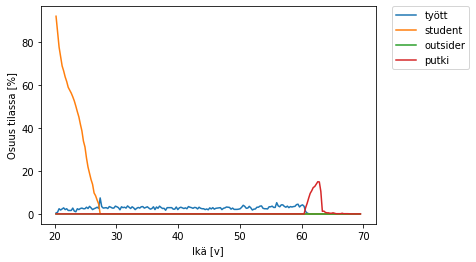

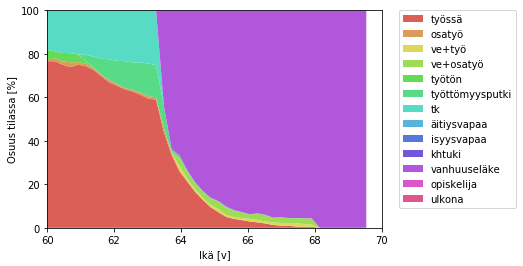

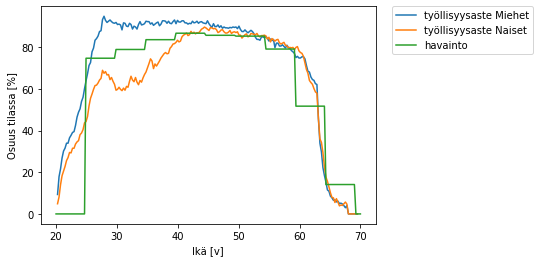

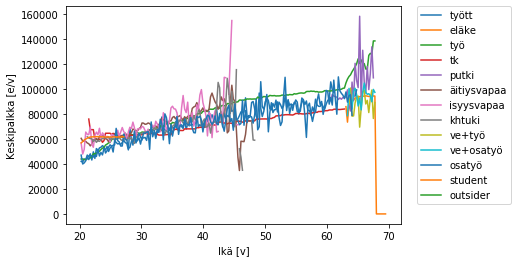

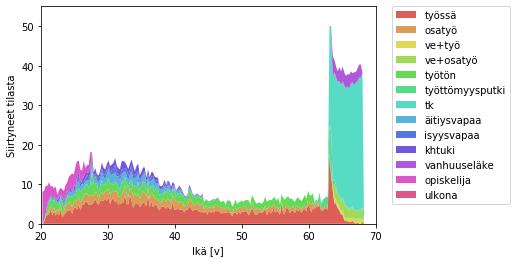

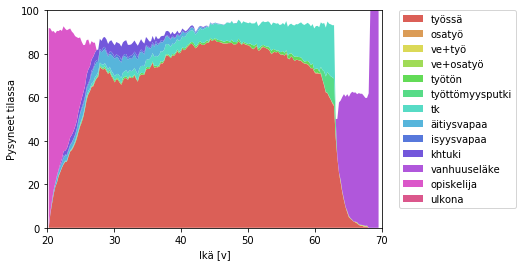

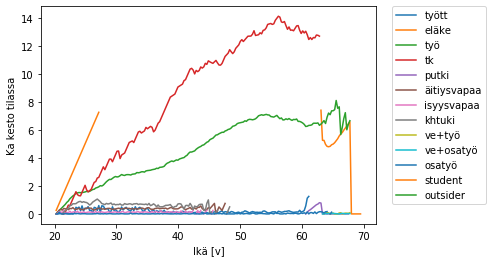

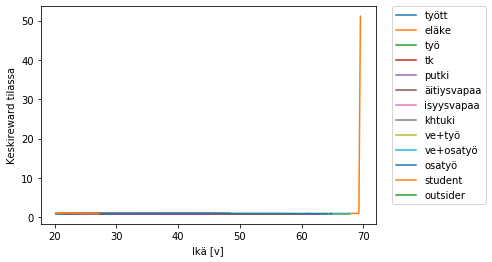

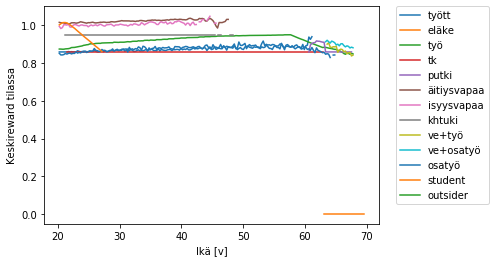

No handles with labels found to put in legend.


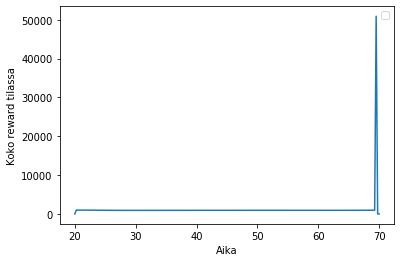

Yhteensä reward 236.03025760985372


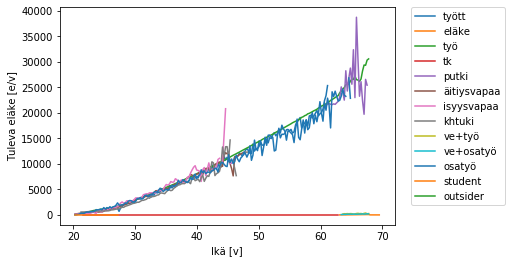

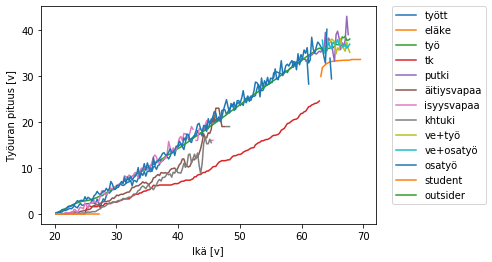

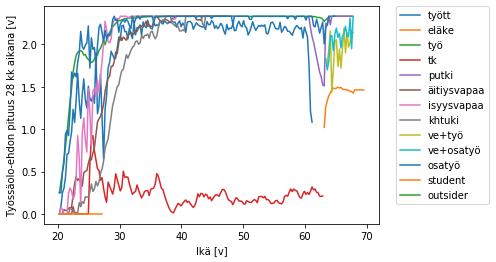

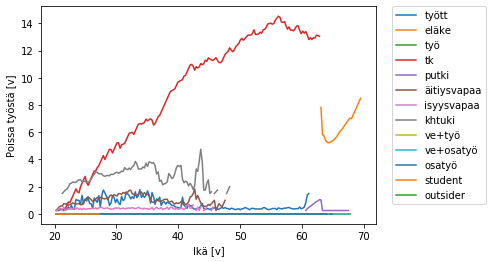

In [9]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_ek',plot=True,
                results='results/ek_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
#cc2.render(load='results/ek_results')
#cc2.load_sim(load='results/ek_results')

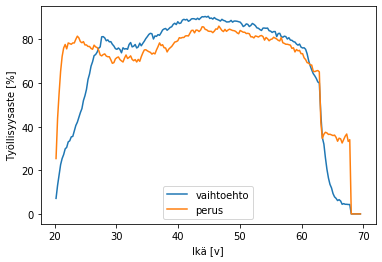

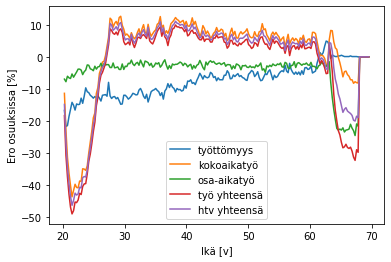

Työllisyysvaikutus 30-63-vuotiaisiin noin 141899.0 htv ja 112482.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 15.257320277307151 prosenttia
Epävarmuus työllisyysasteissa 0.061980642139300234, hajonta 0.058511375466328855


In [10]:
cc2.compare_with(cc1)
#print(cc1.episodestats.empstate/cc1.n_pop,cc2.episodestats.empstate/cc2.n_pop)
#cc2.episodestats.load_sim('results/ek_res__best')
#cc2.episodestats.render()

# Verifiointi

Ajetaan sama simulaatio kaksi kertaa ja tarkastetaan että tulokset ovat sama. Tässä ideana on varmistaa, että satunnaisuus ei sotke tulosten arviointia.

# Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.959    |
| fps                | 1006     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.048   |
| total_timesteps    | 0        |
| value_loss         | 0.384    |
---------------------------------
---------------------------------
| explained_variance | 0.547    |
| fps                | 1771     |
| nupdates           | 10       |
| policy_entropy     | 0.809    |
| policy_loss        | -0.0133  |
| total_timesteps    | 22041    |
| value_loss         | 4.71     |
---------------------------------
---------------------------------
| explained_variance | 0.774    |
| fps                | 1556     |
| nupdates           | 20       |
| policy_entropy     | 0.833    |
| policy_loss        | -2.03    |
| total_timesteps    | 46531    |
| value_loss         | 8.78     |
------------------------

---------------------------------
| explained_variance | 0.923    |
| fps                | 1058     |
| nupdates           | 270      |
| policy_entropy     | 0.96     |
| policy_loss        | 0.6      |
| total_timesteps    | 658781   |
| value_loss         | 0.982    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 1055     |
| nupdates           | 280      |
| policy_entropy     | 0.935    |
| policy_loss        | 1.11     |
| total_timesteps    | 683271   |
| value_loss         | 2.04     |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1050     |
| nupdates           | 290      |
| policy_entropy     | 0.976    |
| policy_loss        | -0.853   |
| total_timesteps    | 707761   |
| value_loss         | 1.27     |
---------------------------------
---------------------------------
| explained_variance | 0.919    |
| fps         

---------------------------------
| explained_variance | 0.881    |
| fps                | 990      |
| nupdates           | 540      |
| policy_entropy     | 0.873    |
| policy_loss        | 0.0111   |
| total_timesteps    | 1320011  |
| value_loss         | 0.411    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 988      |
| nupdates           | 550      |
| policy_entropy     | 0.933    |
| policy_loss        | -0.0293  |
| total_timesteps    | 1344501  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 987      |
| nupdates           | 560      |
| policy_entropy     | 0.872    |
| policy_loss        | 0.045    |
| total_timesteps    | 1368991  |
| value_loss         | 0.263    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 945      |
| nupdates           | 810      |
| policy_entropy     | 0.801    |
| policy_loss        | 0.0889   |
| total_timesteps    | 1981241  |
| value_loss         | 0.367    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 944      |
| nupdates           | 820      |
| policy_entropy     | 0.802    |
| policy_loss        | 0.0345   |
| total_timesteps    | 2005731  |
| value_loss         | 0.251    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 943      |
| nupdates           | 830      |
| policy_entropy     | 0.844    |
| policy_loss        | -0.0355  |
| total_timesteps    | 2030221  |
| value_loss         | 0.358    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 928      |
| nupdates           | 1080     |
| policy_entropy     | 0.812    |
| policy_loss        | 0.0582   |
| total_timesteps    | 2642471  |
| value_loss         | 0.348    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 927      |
| nupdates           | 1090     |
| policy_entropy     | 0.772    |
| policy_loss        | -0.198   |
| total_timesteps    | 2666961  |
| value_loss         | 0.81     |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 927      |
| nupdates           | 1100     |
| policy_entropy     | 0.81     |
| policy_loss        | -0.0391  |
| total_timesteps    | 2691451  |
| value_loss         | 0.232    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.949    |
| fps                | 921      |
| nupdates           | 1350     |
| policy_entropy     | 0.827    |
| policy_loss        | -0.208   |
| total_timesteps    | 3303701  |
| value_loss         | 0.557    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 922      |
| nupdates           | 1360     |
| policy_entropy     | 0.781    |
| policy_loss        | 0.102    |
| total_timesteps    | 3328191  |
| value_loss         | 0.23     |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 921      |
| nupdates           | 1370     |
| policy_entropy     | 0.835    |
| policy_loss        | -0.0417  |
| total_timesteps    | 3352681  |
| value_loss         | 0.324    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 931      |
| nupdates           | 1620     |
| policy_entropy     | 0.791    |
| policy_loss        | -0.232   |
| total_timesteps    | 3964931  |
| value_loss         | 0.484    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 931      |
| nupdates           | 1630     |
| policy_entropy     | 0.805    |
| policy_loss        | 0.14     |
| total_timesteps    | 3989421  |
| value_loss         | 0.549    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 931      |
| nupdates           | 1640     |
| policy_entropy     | 0.841    |
| policy_loss        | -0.00505 |
| total_timesteps    | 4013911  |
| value_loss         | 0.359    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 941      |
| nupdates           | 1890     |
| policy_entropy     | 0.788    |
| policy_loss        | 0.0517   |
| total_timesteps    | 4626161  |
| value_loss         | 0.268    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 941      |
| nupdates           | 1900     |
| policy_entropy     | 0.778    |
| policy_loss        | 0.0903   |
| total_timesteps    | 4650651  |
| value_loss         | 0.265    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 941      |
| nupdates           | 1910     |
| policy_entropy     | 0.793    |
| policy_loss        | -0.0606  |
| total_timesteps    | 4675141  |
| value_loss         | 0.333    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 951      |
| nupdates           | 2160     |
| policy_entropy     | 0.837    |
| policy_loss        | 0.457    |
| total_timesteps    | 5287391  |
| value_loss         | 0.726    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 951      |
| nupdates           | 2170     |
| policy_entropy     | 0.847    |
| policy_loss        | -0.439   |
| total_timesteps    | 5311881  |
| value_loss         | 0.664    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 951      |
| nupdates           | 2180     |
| policy_entropy     | 0.792    |
| policy_loss        | 0.0802   |
| total_timesteps    | 5336371  |
| value_loss         | 0.38     |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.947    |
| fps                | 958      |
| nupdates           | 2430     |
| policy_entropy     | 0.835    |
| policy_loss        | 0.748    |
| total_timesteps    | 5948621  |
| value_loss         | 1.6      |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 958      |
| nupdates           | 2440     |
| policy_entropy     | 0.813    |
| policy_loss        | -0.0385  |
| total_timesteps    | 5973111  |
| value_loss         | 0.412    |
---------------------------------
---------------------------------
| explained_variance | 0.902    |
| fps                | 958      |
| nupdates           | 2450     |
| policy_entropy     | 0.817    |
| policy_loss        | -0.621   |
| total_timesteps    | 5997601  |
| value_loss         | 1.08     |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 968      |
| nupdates           | 2700     |
| policy_entropy     | 0.824    |
| policy_loss        | -0.434   |
| total_timesteps    | 6609851  |
| value_loss         | 0.662    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 968      |
| nupdates           | 2710     |
| policy_entropy     | 0.843    |
| policy_loss        | 0.121    |
| total_timesteps    | 6634341  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 968      |
| nupdates           | 2720     |
| policy_entropy     | 0.811    |
| policy_loss        | 0.219    |
| total_timesteps    | 6658831  |
| value_loss         | 0.574    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 976      |
| nupdates           | 2970     |
| policy_entropy     | 0.82     |
| policy_loss        | 0.0156   |
| total_timesteps    | 7271081  |
| value_loss         | 0.295    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 977      |
| nupdates           | 2980     |
| policy_entropy     | 0.886    |
| policy_loss        | -0.097   |
| total_timesteps    | 7295571  |
| value_loss         | 0.335    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 976      |
| nupdates           | 2990     |
| policy_entropy     | 0.897    |
| policy_loss        | -0.134   |
| total_timesteps    | 7320061  |
| value_loss         | 0.373    |
---------------------------------
---------------------------------
| explained_variance | 0.936    |
| fps         

---------------------------------
| explained_variance | 0.956    |
| fps                | 983      |
| nupdates           | 3240     |
| policy_entropy     | 0.771    |
| policy_loss        | -0.138   |
| total_timesteps    | 7932311  |
| value_loss         | 0.762    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 983      |
| nupdates           | 3250     |
| policy_entropy     | 0.786    |
| policy_loss        | 0.0592   |
| total_timesteps    | 7956801  |
| value_loss         | 0.209    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 983      |
| nupdates           | 3260     |
| policy_entropy     | 0.776    |
| policy_loss        | -0.0863  |
| total_timesteps    | 7981291  |
| value_loss         | 0.468    |
---------------------------------
----------------------------------
| explained_variance | 0.971     |
| fps       

---------------------------------
| explained_variance | 0.986    |
| fps                | 335      |
| nupdates           | 3510     |
| policy_entropy     | 0.727    |
| policy_loss        | 0.0407   |
| total_timesteps    | 8593541  |
| value_loss         | 0.28     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 335      |
| nupdates           | 3520     |
| policy_entropy     | 0.737    |
| policy_loss        | -0.0597  |
| total_timesteps    | 8618031  |
| value_loss         | 0.313    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 336      |
| nupdates           | 3530     |
| policy_entropy     | 0.797    |
| policy_loss        | -0.00139 |
| total_timesteps    | 8642521  |
| value_loss         | 0.272    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 326      |
| nupdates           | 3780     |
| policy_entropy     | 0.769    |
| policy_loss        | -0.121   |
| total_timesteps    | 9254771  |
| value_loss         | 0.686    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 327      |
| nupdates           | 3790     |
| policy_entropy     | 0.733    |
| policy_loss        | 0.0824   |
| total_timesteps    | 9279261  |
| value_loss         | 0.2      |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 327      |
| nupdates           | 3800     |
| policy_entropy     | 0.779    |
| policy_loss        | 0.0685   |
| total_timesteps    | 9303751  |
| value_loss         | 0.205    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 315      |
| nupdates           | 4050     |
| policy_entropy     | 0.788    |
| policy_loss        | 0.0717   |
| total_timesteps    | 9916001  |
| value_loss         | 0.227    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 315      |
| nupdates           | 4060     |
| policy_entropy     | 0.753    |
| policy_loss        | -0.0653  |
| total_timesteps    | 9940491  |
| value_loss         | 0.356    |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps                | 316      |
| nupdates           | 4070     |
| policy_entropy     | 0.74     |
| policy_loss        | -0.0147  |
| total_timesteps    | 9964981  |
| value_loss         | 0.321    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

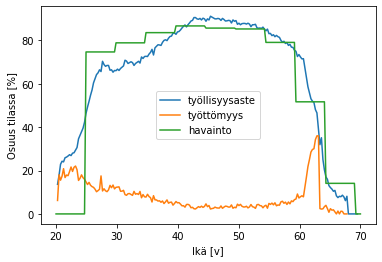

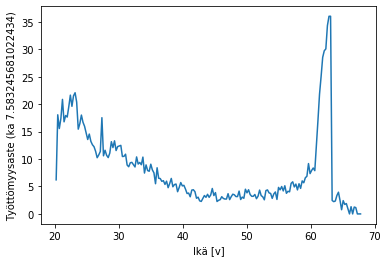

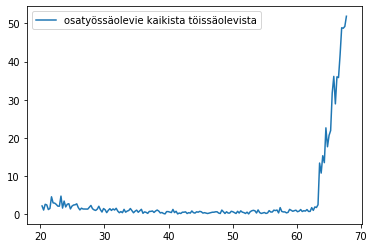

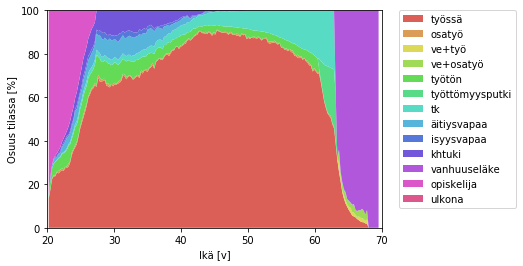

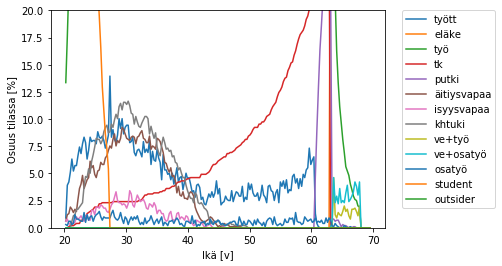

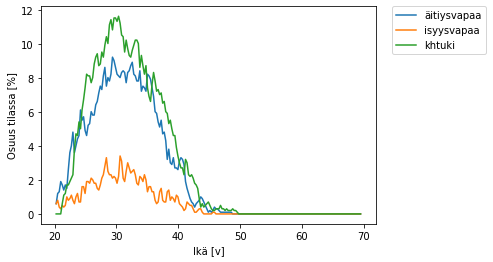

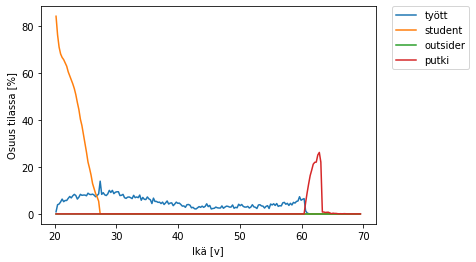

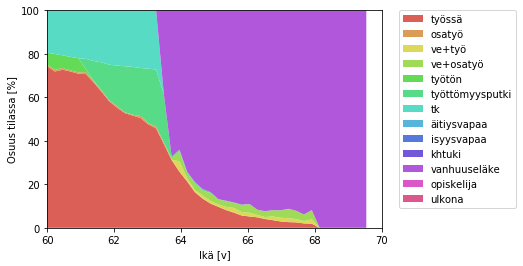

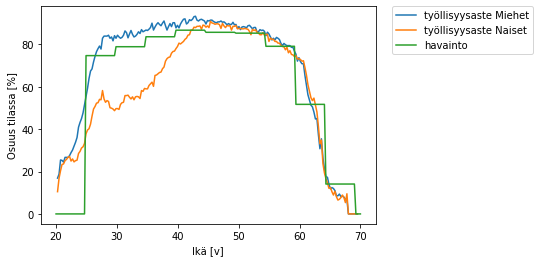

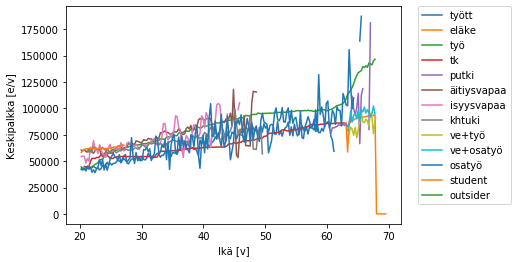

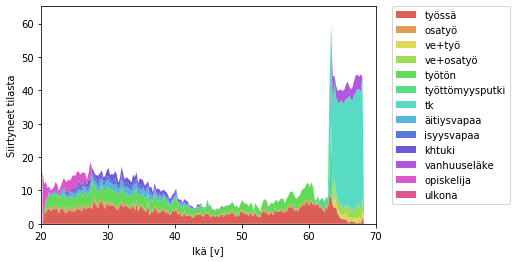

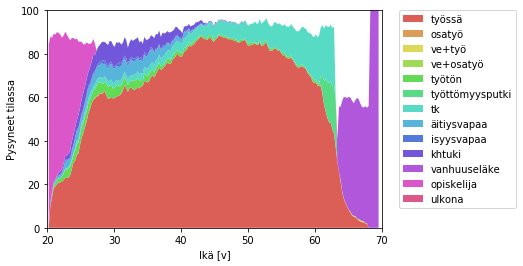

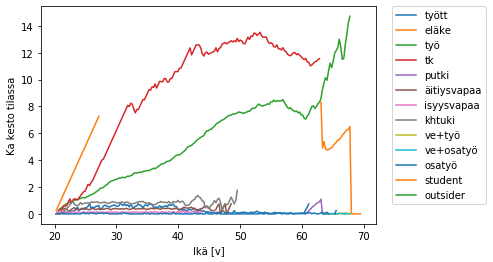

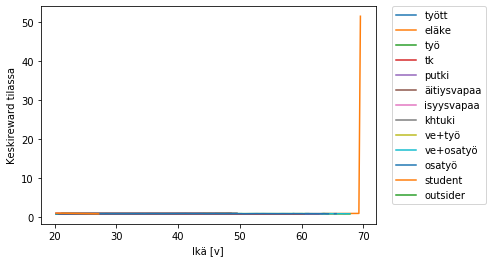

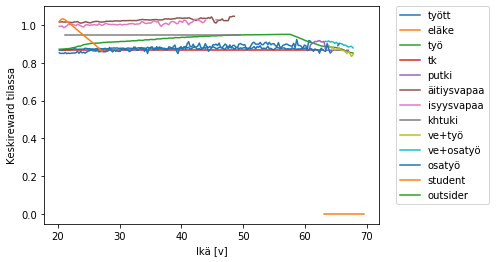

No handles with labels found to put in legend.


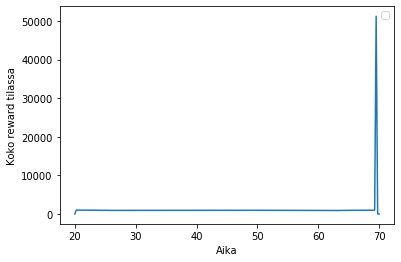

Yhteensä reward 236.71892517495831


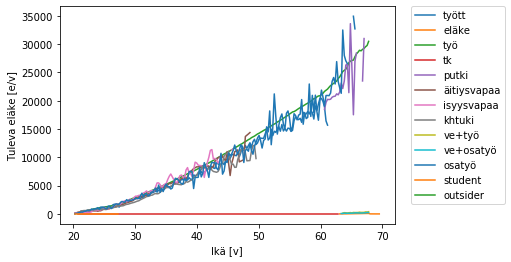

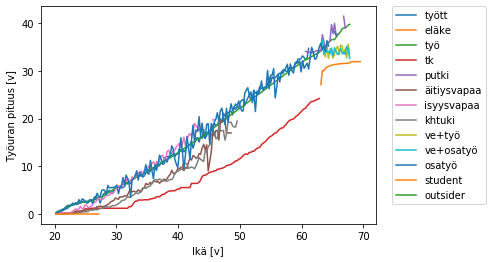

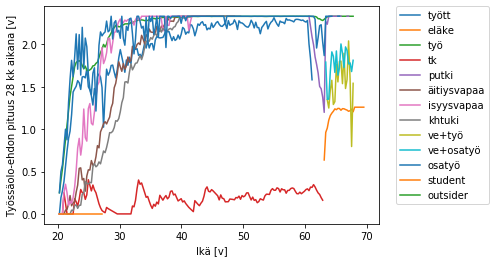

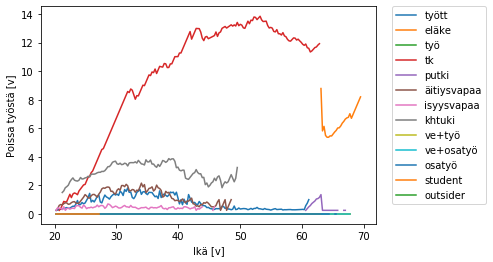

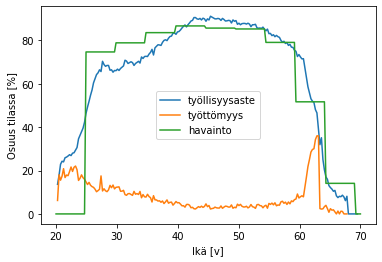

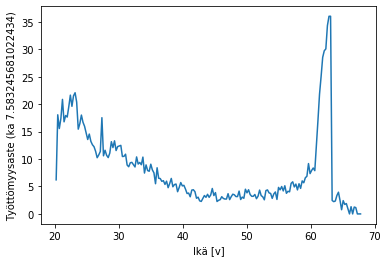

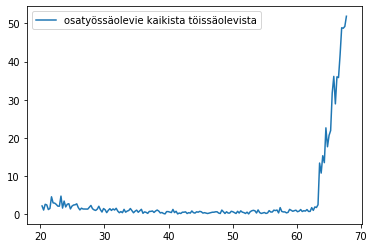

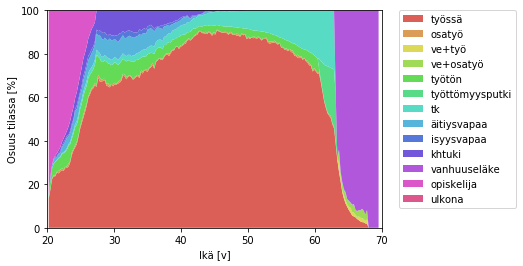

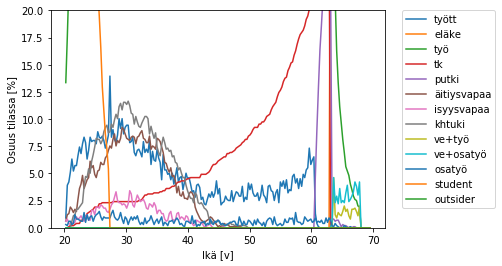

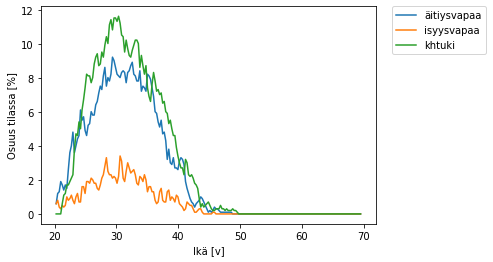

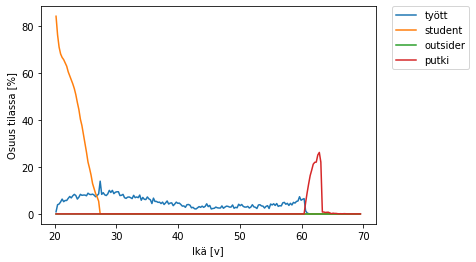

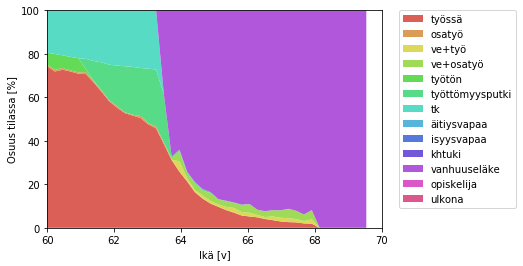

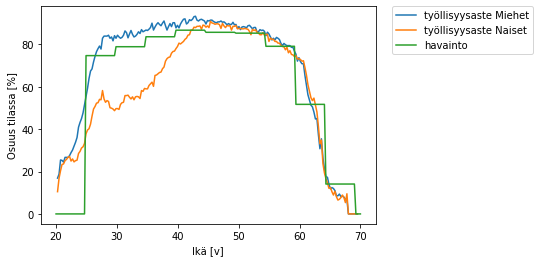

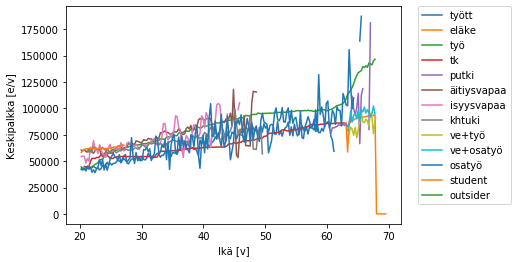

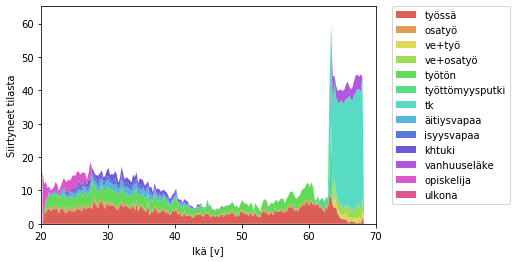

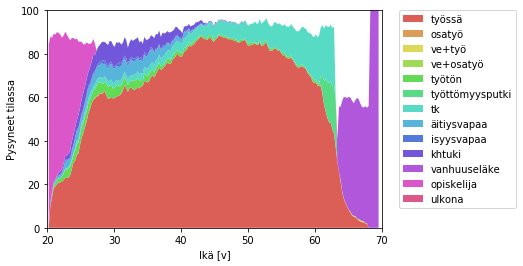

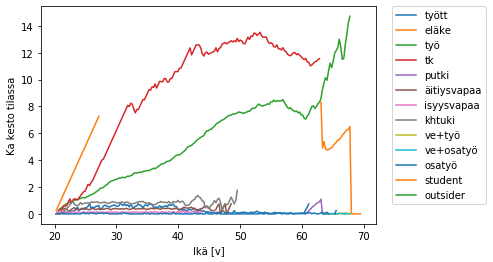

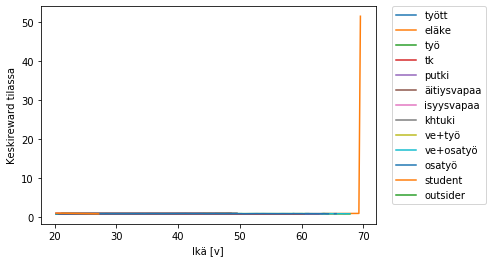

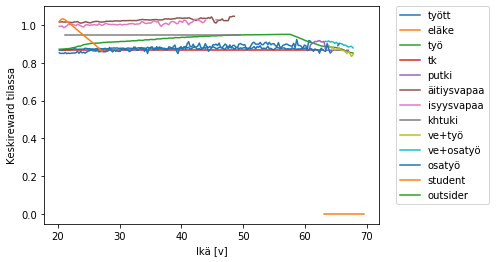

No handles with labels found to put in legend.


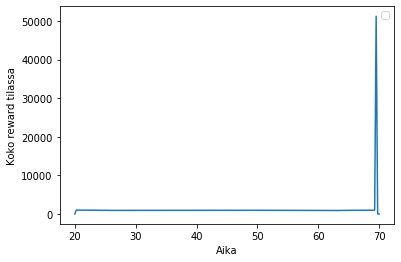

Yhteensä reward 236.71892517495831


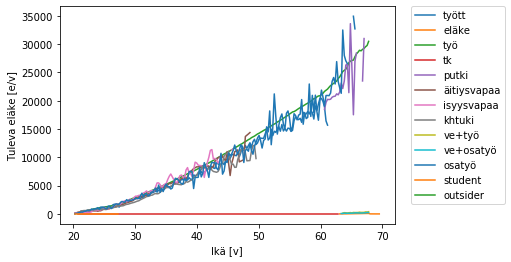

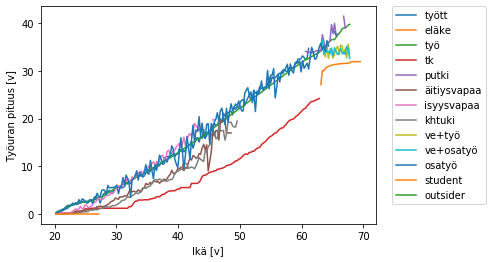

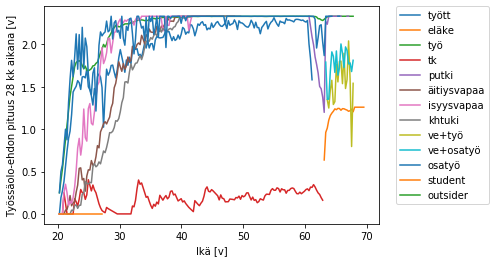

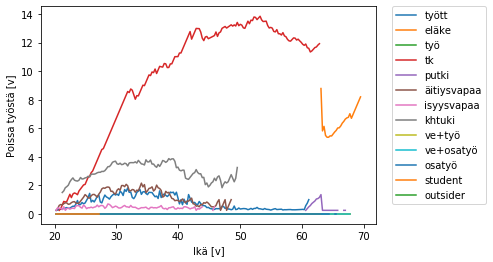

In [11]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_toe.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/best_12kk',plot=True,
                    results='results/12kk_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_toe.render(load='results/12kk_results')


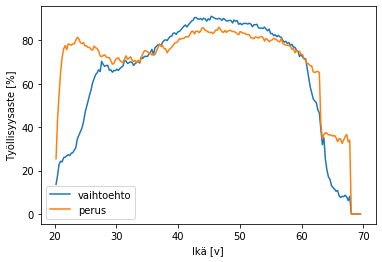

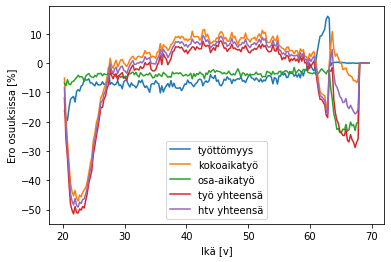

Työllisyysvaikutus 30-63-vuotiaisiin noin 90789.0 htv ja 49687.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 6.739660324483587 prosenttia
Epävarmuus työllisyysasteissa 0.061980642139300234, hajonta 0.08817705656781123


In [12]:
cc1_toe.compare_with(cc1)

# Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,
                  mortality=mortality,perustulo=False,randomness=randomness)
cc1_350.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_50pv',plot=True,
                    results='results/50pv_results',start_from=perusmalli,cont=True,
                    callback_minsteps=callback_minsteps,twostage=twostage)
cc1_350.render(load='results/50pv_results')
cc1_350.compare_with(cc1)

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.957    |
| fps                | 1267     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.157   |
| total_timesteps    | 0        |
| value_loss         | 0.682    |
---------------------------------
---------------------------------
| explained_variance | 0.848    |
| fps                | 1990     |
| nupdates           | 10       |
| policy_entropy     | 0.358    |
| policy_loss        | 0.472    |
| total_timesteps    | 22041    |
| value_loss         | 2.49     |
---------------------------------
---------------------------------
| explained_variance | 0.908    |
| fps                | 157      |
| nupdates           | 20       |
| policy_entropy     | 0.323    |
| policy_loss        | -0.129   |
| total_timesteps    | 46531    |
| value_loss         | 1.05     |
------------------------

---------------------------------
| explained_variance | 0.927    |
| fps                | 287      |
| nupdates           | 270      |
| policy_entropy     | 0.754    |
| policy_loss        | 0.0512   |
| total_timesteps    | 658781   |
| value_loss         | 0.746    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 283      |
| nupdates           | 280      |
| policy_entropy     | 0.725    |
| policy_loss        | 0.0764   |
| total_timesteps    | 683271   |
| value_loss         | 0.398    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 291      |
| nupdates           | 290      |
| policy_entropy     | 0.82     |
| policy_loss        | -0.00569 |
| total_timesteps    | 707761   |
| value_loss         | 0.442    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps         

---------------------------------
| explained_variance | 0.947    |
| fps                | 270      |
| nupdates           | 540      |
| policy_entropy     | 0.827    |
| policy_loss        | 0.116    |
| total_timesteps    | 1320011  |
| value_loss         | 0.527    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 274      |
| nupdates           | 550      |
| policy_entropy     | 0.827    |
| policy_loss        | -0.068   |
| total_timesteps    | 1344501  |
| value_loss         | 0.498    |
---------------------------------
---------------------------------
| explained_variance | 0.893    |
| fps                | 278      |
| nupdates           | 560      |
| policy_entropy     | 0.862    |
| policy_loss        | -0.193   |
| total_timesteps    | 1368991  |
| value_loss         | 0.778    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 141      |
| nupdates           | 810      |
| policy_entropy     | 0.8      |
| policy_loss        | 0.111    |
| total_timesteps    | 1981241  |
| value_loss         | 0.63     |
---------------------------------
---------------------------------
| explained_variance | 0.927    |
| fps                | 142      |
| nupdates           | 820      |
| policy_entropy     | 0.8      |
| policy_loss        | -0.151   |
| total_timesteps    | 2005731  |
| value_loss         | 0.953    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 144      |
| nupdates           | 830      |
| policy_entropy     | 0.792    |
| policy_loss        | 0.05     |
| total_timesteps    | 2030221  |
| value_loss         | 0.32     |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 182      |
| nupdates           | 1080     |
| policy_entropy     | 0.786    |
| policy_loss        | 0.0586   |
| total_timesteps    | 2642471  |
| value_loss         | 0.236    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 184      |
| nupdates           | 1090     |
| policy_entropy     | 0.812    |
| policy_loss        | -0.0769  |
| total_timesteps    | 2666961  |
| value_loss         | 0.268    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 185      |
| nupdates           | 1100     |
| policy_entropy     | 0.798    |
| policy_loss        | 0.0113   |
| total_timesteps    | 2691451  |
| value_loss         | 0.368    |
---------------------------------
---------------------------------
| explained_variance | 0.937    |
| fps         

---------------------------------
| explained_variance | 0.892    |
| fps                | 221      |
| nupdates           | 1350     |
| policy_entropy     | 0.933    |
| policy_loss        | -0.183   |
| total_timesteps    | 3303701  |
| value_loss         | 0.776    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 223      |
| nupdates           | 1360     |
| policy_entropy     | 0.745    |
| policy_loss        | 0.093    |
| total_timesteps    | 3328191  |
| value_loss         | 0.191    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 224      |
| nupdates           | 1370     |
| policy_entropy     | 0.83     |
| policy_loss        | -0.155   |
| total_timesteps    | 3352681  |
| value_loss         | 0.489    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 257      |
| nupdates           | 1620     |
| policy_entropy     | 0.778    |
| policy_loss        | 0.0519   |
| total_timesteps    | 3964931  |
| value_loss         | 0.366    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 258      |
| nupdates           | 1630     |
| policy_entropy     | 0.759    |
| policy_loss        | 0.0818   |
| total_timesteps    | 3989421  |
| value_loss         | 0.383    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 260      |
| nupdates           | 1640     |
| policy_entropy     | 0.749    |
| policy_loss        | 0.0513   |
| total_timesteps    | 4013911  |
| value_loss         | 0.236    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.956    |
| fps                | 290      |
| nupdates           | 1890     |
| policy_entropy     | 0.741    |
| policy_loss        | 0.0234   |
| total_timesteps    | 4626161  |
| value_loss         | 0.396    |
---------------------------------
---------------------------------
| explained_variance | 0.907    |
| fps                | 291      |
| nupdates           | 1900     |
| policy_entropy     | 0.71     |
| policy_loss        | -0.091   |
| total_timesteps    | 4650651  |
| value_loss         | 0.454    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 293      |
| nupdates           | 1910     |
| policy_entropy     | 0.78     |
| policy_loss        | 0.0656   |
| total_timesteps    | 4675141  |
| value_loss         | 0.357    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 321      |
| nupdates           | 2160     |
| policy_entropy     | 0.823    |
| policy_loss        | -0.131   |
| total_timesteps    | 5287391  |
| value_loss         | 0.521    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 322      |
| nupdates           | 2170     |
| policy_entropy     | 0.798    |
| policy_loss        | 0.0312   |
| total_timesteps    | 5311881  |
| value_loss         | 0.411    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 323      |
| nupdates           | 2180     |
| policy_entropy     | 0.798    |
| policy_loss        | -0.115   |
| total_timesteps    | 5336371  |
| value_loss         | 0.528    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.951    |
| fps                | 350      |
| nupdates           | 2430     |
| policy_entropy     | 0.775    |
| policy_loss        | 0.841    |
| total_timesteps    | 5948621  |
| value_loss         | 1.82     |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 351      |
| nupdates           | 2440     |
| policy_entropy     | 0.805    |
| policy_loss        | 0.237    |
| total_timesteps    | 5973111  |
| value_loss         | 0.642    |
---------------------------------
---------------------------------
| explained_variance | 0.917    |
| fps                | 352      |
| nupdates           | 2450     |
| policy_entropy     | 0.812    |
| policy_loss        | -0.923   |
| total_timesteps    | 5997601  |
| value_loss         | 2.21     |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 377      |
| nupdates           | 2700     |
| policy_entropy     | 0.806    |
| policy_loss        | 0.0234   |
| total_timesteps    | 6609851  |
| value_loss         | 0.518    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 378      |
| nupdates           | 2710     |
| policy_entropy     | 0.817    |
| policy_loss        | 0.345    |
| total_timesteps    | 6634341  |
| value_loss         | 0.72     |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 379      |
| nupdates           | 2720     |
| policy_entropy     | 0.827    |
| policy_loss        | -0.506   |
| total_timesteps    | 6658831  |
| value_loss         | 1.02     |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.954    |
| fps                | 286      |
| nupdates           | 2970     |
| policy_entropy     | 0.773    |
| policy_loss        | -0.0332  |
| total_timesteps    | 7271081  |
| value_loss         | 0.64     |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 287      |
| nupdates           | 2980     |
| policy_entropy     | 0.759    |
| policy_loss        | -0.162   |
| total_timesteps    | 7295571  |
| value_loss         | 0.471    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 288      |
| nupdates           | 2990     |
| policy_entropy     | 0.82     |
| policy_loss        | -0.0246  |
| total_timesteps    | 7320061  |
| value_loss         | 0.449    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 307      |
| nupdates           | 3240     |
| policy_entropy     | 0.776    |
| policy_loss        | 0.0602   |
| total_timesteps    | 7932311  |
| value_loss         | 0.225    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 308      |
| nupdates           | 3250     |
| policy_entropy     | 0.817    |
| policy_loss        | -0.0264  |
| total_timesteps    | 7956801  |
| value_loss         | 0.401    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 308      |
| nupdates           | 3260     |
| policy_entropy     | 0.765    |
| policy_loss        | -0.0437  |
| total_timesteps    | 7981291  |
| value_loss         | 0.665    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

# Perustulo

Alustava versio. Tulee muuttumaan, kun mukana koko mallli.

In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,
                 randomness=randomness)
cc1_pt.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                   train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_pt',plot=True,
                   results='results/perustulo_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_pt.render(load='results/perustulo_results')
cc1_pt.compare_with(cc1)

# 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=400,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_400.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_300pv',plot=True,
                    results='results/300pv_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_400.render(load='results/300pv_results')
cc1_400.compare_with(cc1)